Aryaman Gokarn(506303588)\
Mugdha Bhagwat(606297799)\
Tania Rajabally(806153219)

# **2. Random Walk on Networks**

## 1. Random walk on Erd¨os-R´enyi networks

### Question 1 (a)

In [ ]:
install.packages("igraph")
install.packages("pracma")
install.packages('resample')
install.packages("matrixStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('igraph')
library('Matrix')
library('pracma')
library('resample')
library('matrixStats')

IGRAPH 1c317ce U--- 900 5996 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)


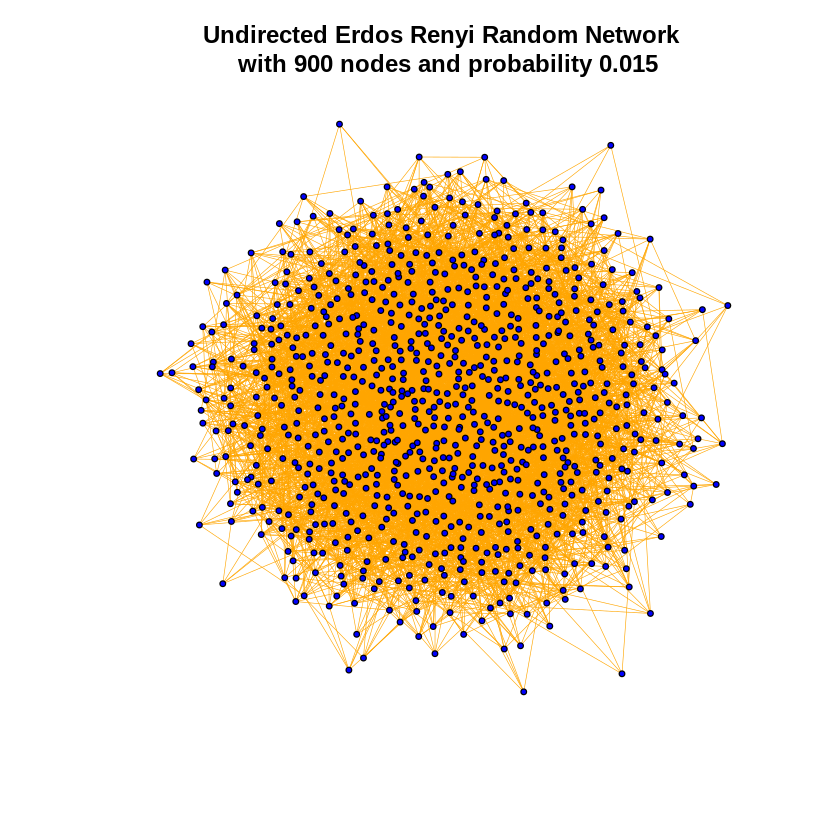

In [ ]:
# Undirected Erdos Renyi Random Network with 900 nodes and probability 0.015
n <- 900
p <- 0.015

random_network <- erdos.renyi.game(n, p, directed = FALSE)

# Network summary and pliot
summary(random_network)

plot(random_network,
     main = "Undirected Erdos Renyi Random Network \n with 900 nodes and probability 0.015",
     vertex.label = NA,
     vertex.size = 2,
     vertex.color = "blue",
     edge.color = "orange",
     edge.width = 0.5)


(a) Create an undirected random network with 900 nodes, and the probability p for
drawing an edge between any pair of nodes equal to 0.015.

> Please refer to the network above. The undirected random network with 900 nodes and probability of 0.015 was created using erdos.renyi.game() function in the igraph library in R.

### Question 1 (b)

In [ ]:
generate_transition_matrix <- function(g) {
  n <- vcount(g)
  adj <- as_adjacency_matrix(g)
  adj[diag(rowSums(adj) == 0)] <- 1
  z <- rowSums(adj)

  transition_matrix <- adj / matrix(z, nrow = n, ncol = n, byrow = TRUE)

  return(transition_matrix)
}


In [ ]:
perform_random_walk <- function(g, num_steps, start_node, transition_matrix = NULL) {
  if (is.null(transition_matrix))
    transition_matrix <- create_transition_matrix(g)

  end_nodes <- numeric(length = num_steps)
  v <- start_node
  for (i in 1:num_steps) {
    PMF <- transition_matrix[v, ]
    v <- sample(1:vcount(g), 1, prob = PMF)
    end_nodes[i] <- v
  }

  return(end_nodes)
}


In [ ]:
plot_graph <- function(g, steps = 100, iterations = 1000) {
  # Get the giant component of the graph
  giant_component <- induced_subgraph(g, which(components(g)$membership == which.max(components(g)$csize)))

  # Create transition matrix for the giant component
  transition_matrix <- generate_transition_matrix(giant_component)

  # Initialize variables to store node distances and last nodes
  nodes <- matrix(NA, nrow = iterations, ncol = steps)
  last_nodes <- numeric(iterations)

  # Perform random walks and record results
  set.seed(1)
  for (i in 1:iterations) {
    start_node <- sample(1:vcount(giant_component), 1)
    row_nodes <- perform_random_walk(giant_component, steps, start_node, transition_matrix)
    last_nodes[i] <- row_nodes[steps]
    nodes[i, ] <- distances(giant_component, row_nodes, start_node)
  }

  # Calculate means and variances
  means <- colMeans(nodes)
  vars <- colVars(nodes)


  # Plot average distance vs. number of steps
  plot(means, main = "Average Distance vs. Number of Steps",
       xlab = "t (Number of Steps)", ylab = "<s(t)> (Average Distance)", col = "blue")
  lines(means, col = "orange")

  # Plot standard deviation vs. number of steps
  plot(vars, main = "Variance vs. Number of Steps",
       xlab = "t (Number of Steps)", ylab = "σ^2(t) (Variance)", col = "blue")
  lines(vars, col = "orange")

  return(last_nodes)
}


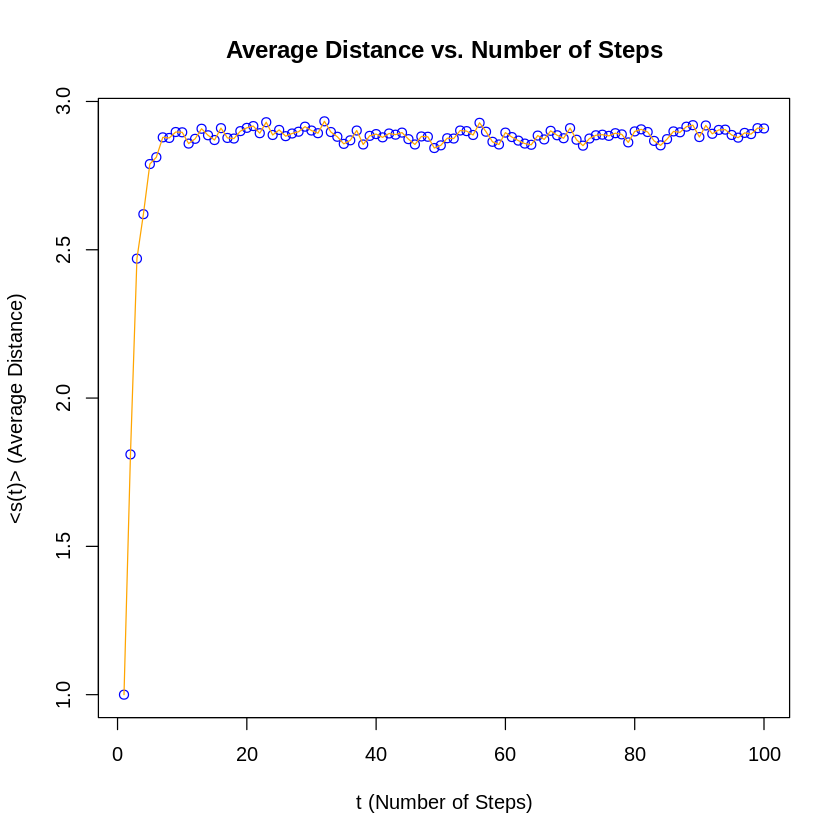

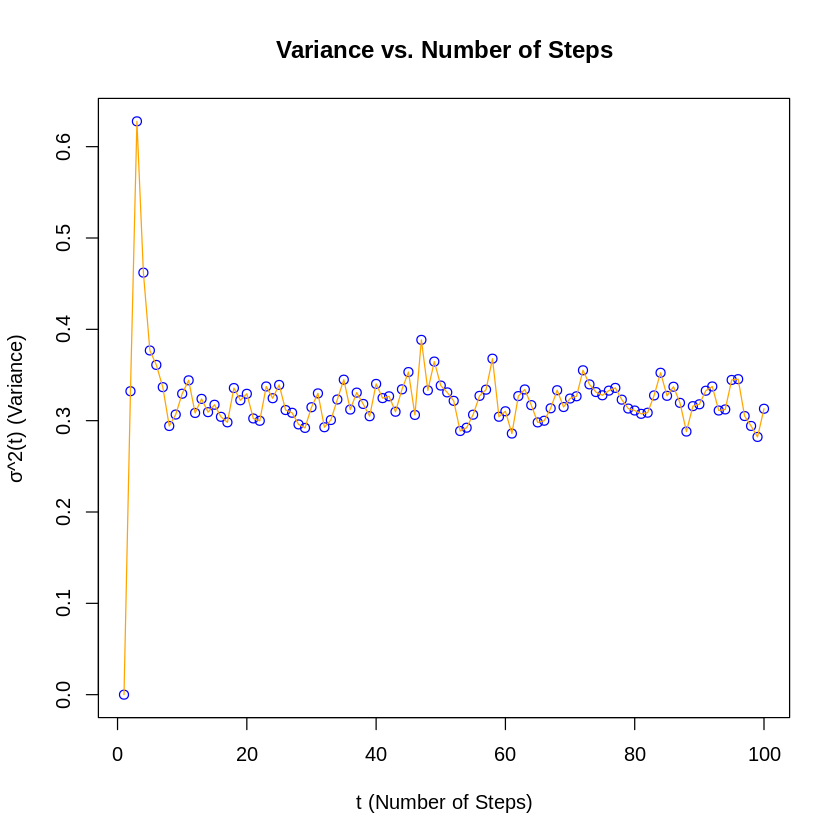

In [ ]:
last_nodes = plot_graph(random_network, 100, 1000)

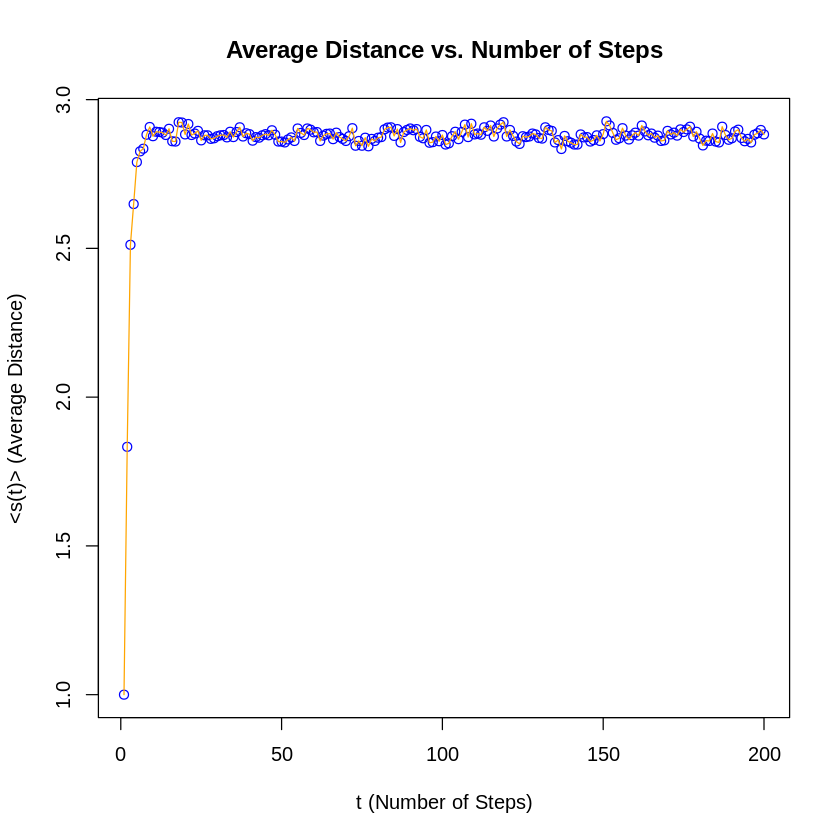

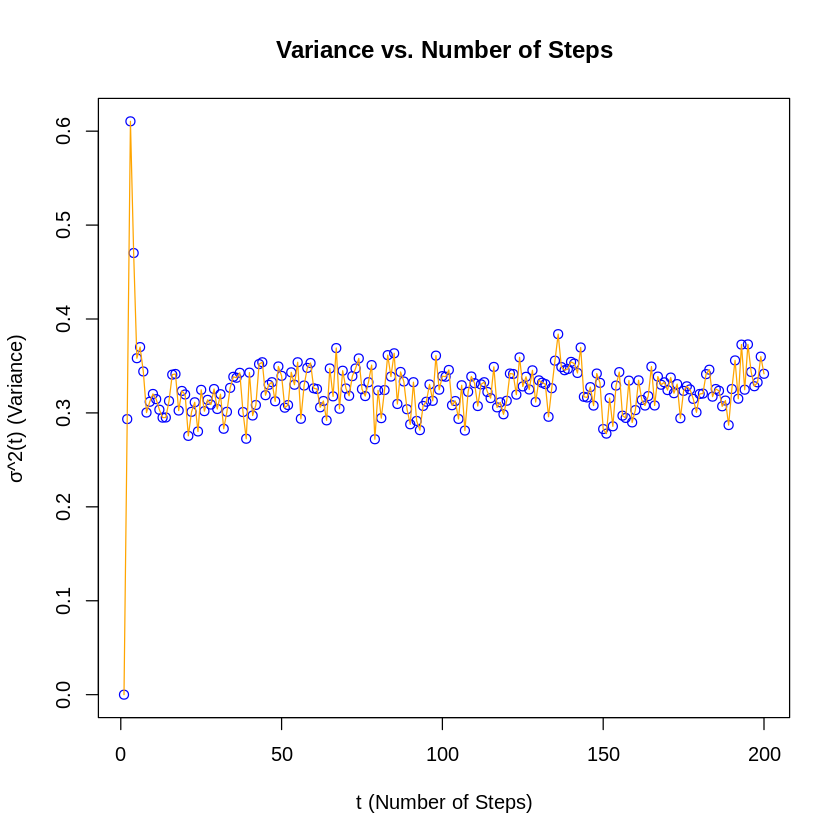

In [ ]:
plot_graph(random_network, 200, 1000)

(b) Let a random walker start from a randomly selected node (no teleportation). We
use t to denote the number of steps that the walker has taken. Measure the average
distance (defined as the shortest path length) ⟨s(t)⟩ of the walker from his starting
point at step t. Also, measure the variance σ
2
(t) = ⟨(s(t) − ⟨s(t)⟩)
2
⟩ of this distance.
Plot ⟨s(t)⟩ v.s. t and σ
2
(t) v.s. t. Here, the average ⟨·⟩ is over random choices of the
starting nodes.

> Thus we can see from the above figures:

We have calculated the Average Distance and the Variance of the Shortest Distance to the walker from the starting node with variable number of steps (100, 200) for the ER Netwrok with n = 900 and p = 0.015.

### Question 1 (c)

In [ ]:
# Function to get the largest connected component (GCC) of a graph
get_gcc <- function(g) {
    if (is_connected(g)) {
        return(g)
    } else {
        components <- clusters(g)
        gcc_id <- which.max(components$csize)
        return(induced.subgraph(g, which(components$membership == gcc_id)))
    }
}

In [ ]:
# Function to measure the degree distribution of the nodes reached at the end of the random walk
measure_degree_distribution <- function(g, steps=100, iters=1000){
    terminal_node_degrees <- numeric(iters)
    for(i in 1:iters){
        gcc <- get_gcc(g)
        start_vert <- sample(V(gcc), 1)
        vert_seq <- random_walk(gcc, start_vert, steps)
        terminal_node_degrees[i] <- degree(gcc, vert_seq[length(vert_seq)])
    }
    return(terminal_node_degrees)
}

In [ ]:
# Measure the degree distribution of the terminal nodes reached at the end of the random walk
terminal_node_degrees <- measure_degree_distribution(random_network)

# Degree distribution of the entire graph
graph_degree_distribution <- degree_distribution(random_network)


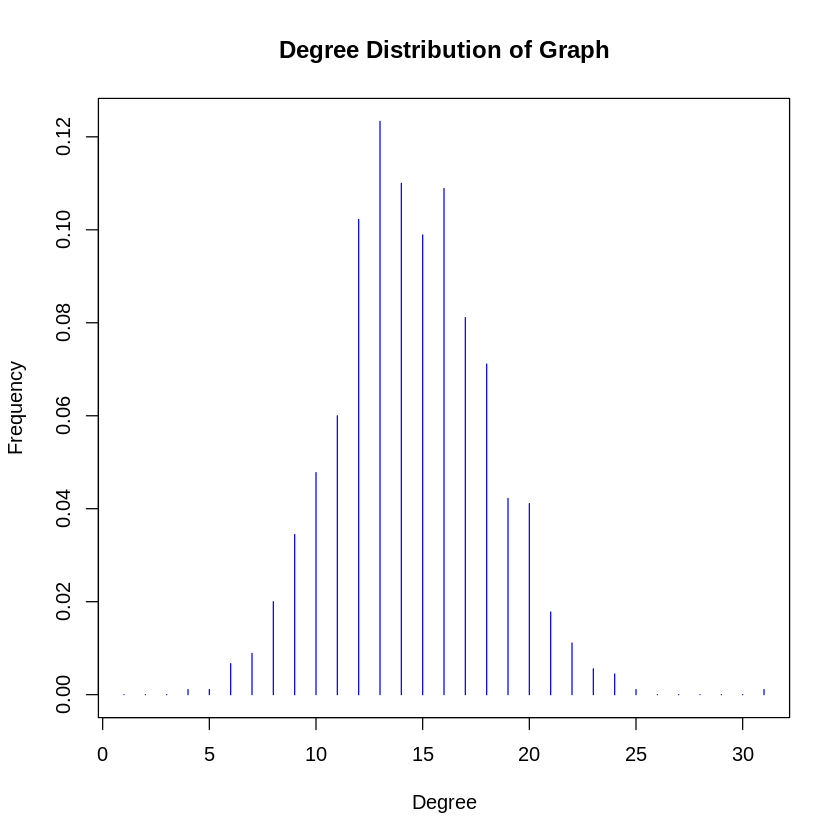

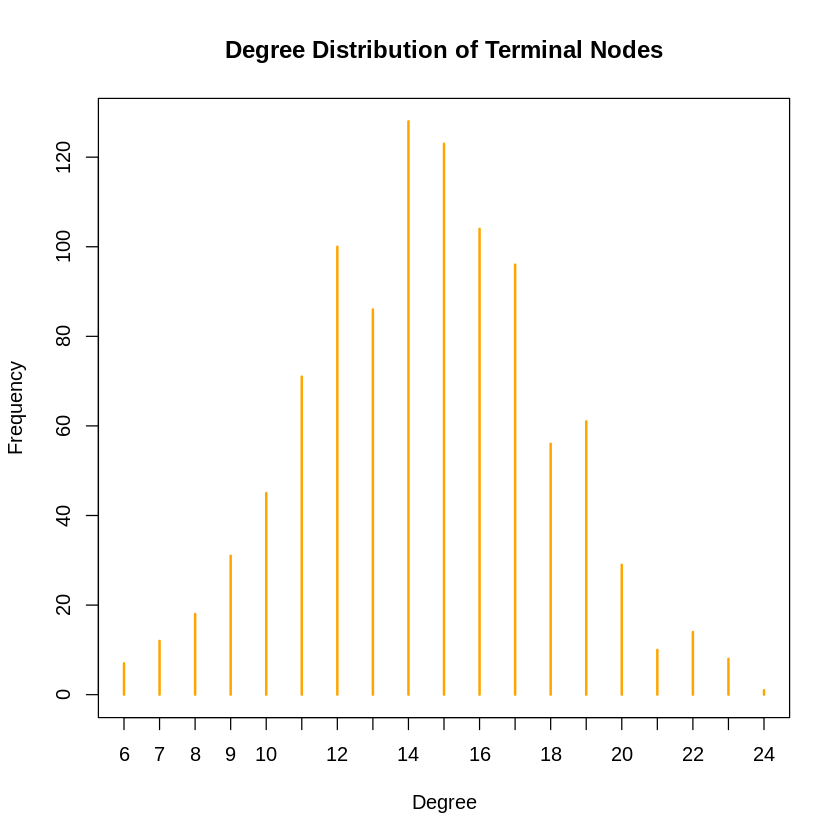

In [ ]:

plot(graph_degree_distribution, type = "h", main = "Degree Distribution of Graph",
     xlab = "Degree", ylab = "Frequency", col = "blue")

plot(table(terminal_node_degrees), main = "Degree Distribution of Terminal Nodes",
     xlab = "Degree", ylab = "Frequency", col = "orange")

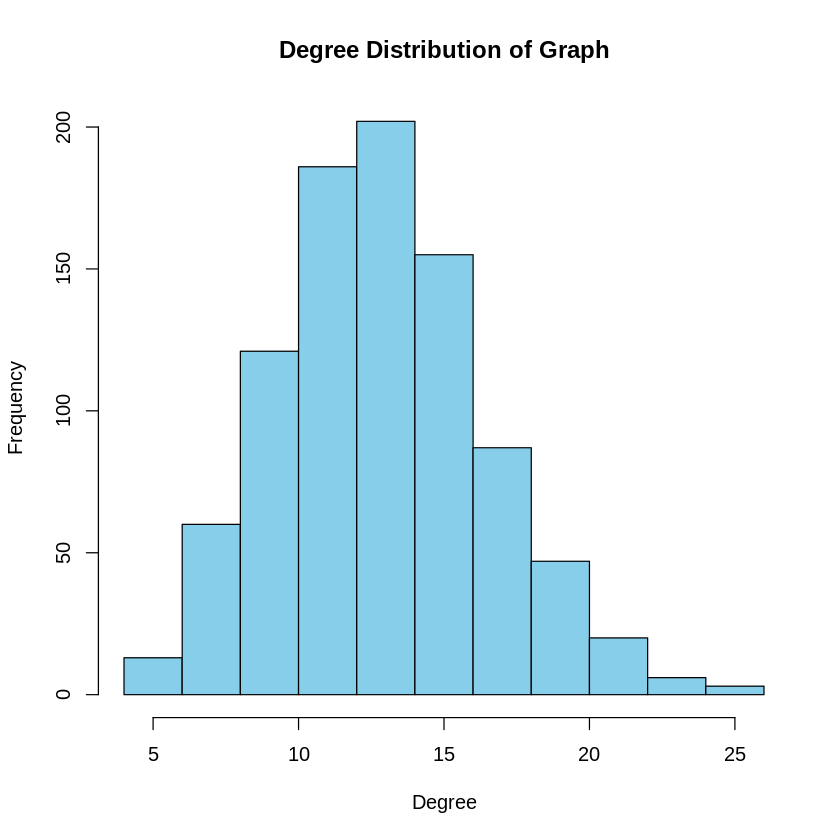

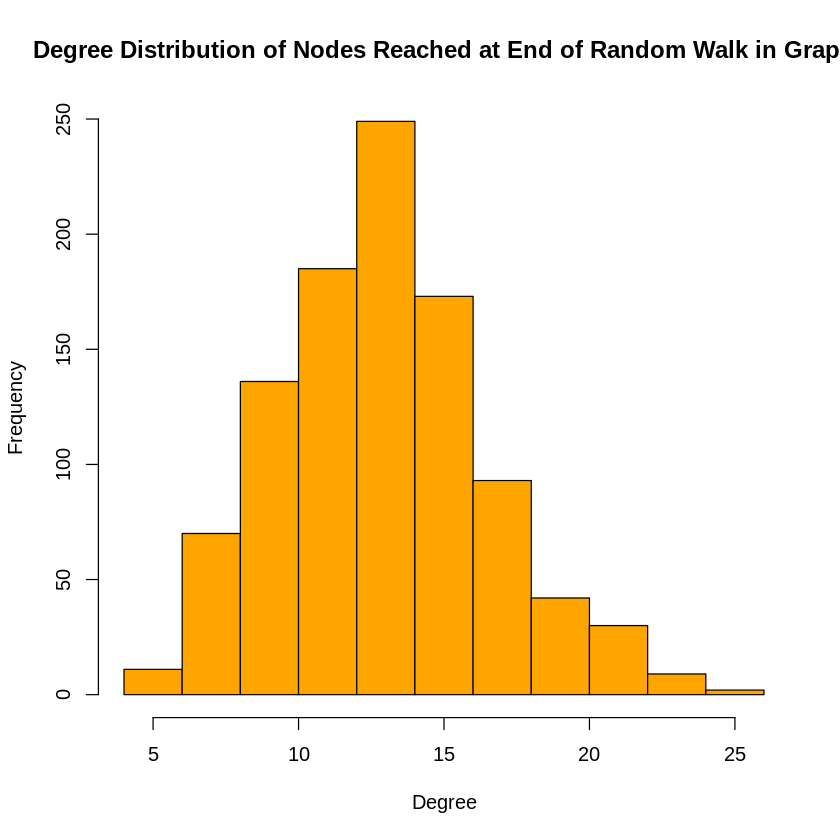

In [ ]:
# For the degree distribution of the graph
degreesVector <- degree(random_network)
hist(degreesVector,
     main = "Degree Distribution of Graph",
     col = "skyblue",
     xlab = "Degree",
     ylab = "Frequency"
)

# For the degree distribution of nodes reached at the end of random walk
degrees_lastnodes <- degree(random_network, last_nodes)
hist(degrees_lastnodes,
     main = "Degree Distribution of Nodes Reached at End of Random Walk in Graph",
     col = "orange",
     xlab = "Degree",
     ylab = "Frequency"
)


(c) Measure the degree distribution of the nodes reached at the end of the random walk.
How does it compare to the degree distribution of graph?

> We observe that both the original graph and the graph for the distribution at the end of the random walk follow a similar binomial distribution. This results aligns with what is expected for E-R networks.



### Question 1 (d)

In [ ]:
# Undirected Erdos Renyi Random Network with 9000 nodes and probability 0.015
n <- 9000
p <- 0.015

random_network_9000 <- erdos.renyi.game(n, p, directed = FALSE)

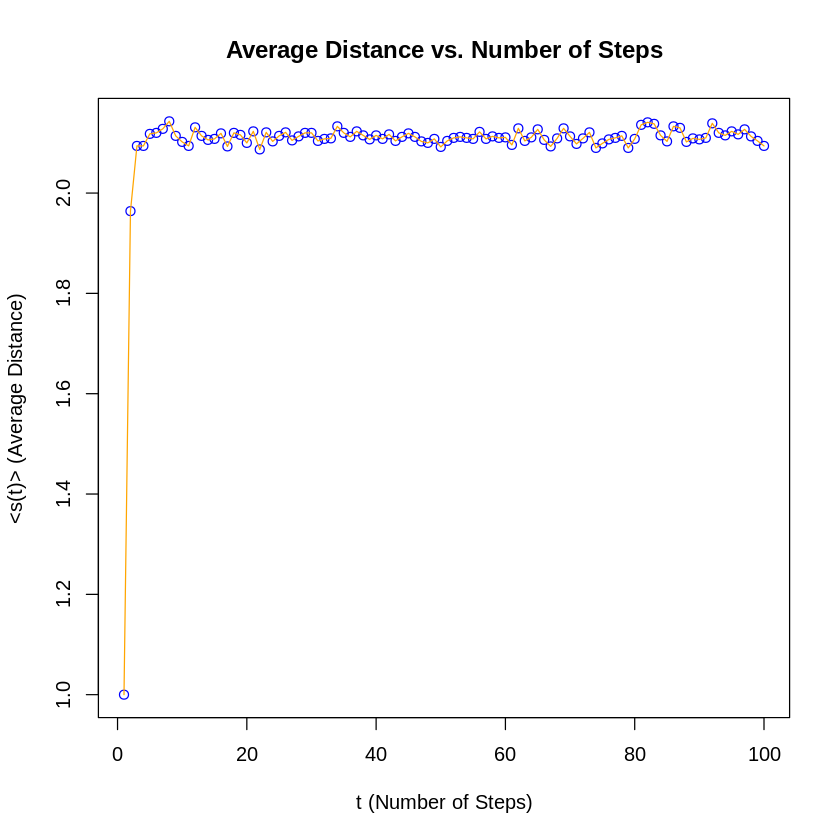

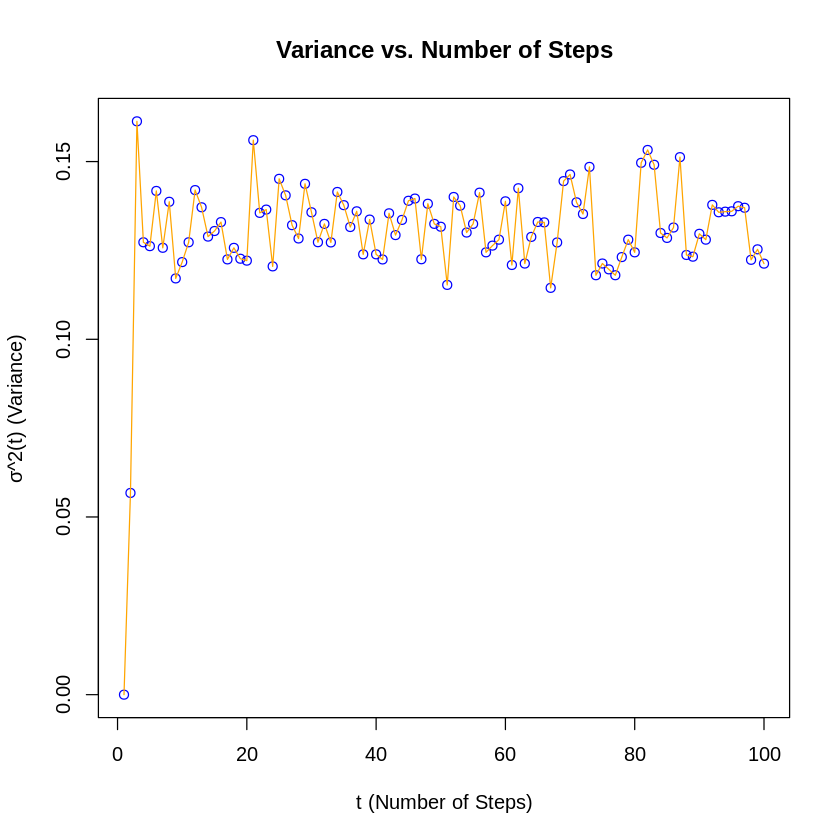

In [ ]:
last_nodes_9000 = plot_graph(random_network_9000, 100, 1000)

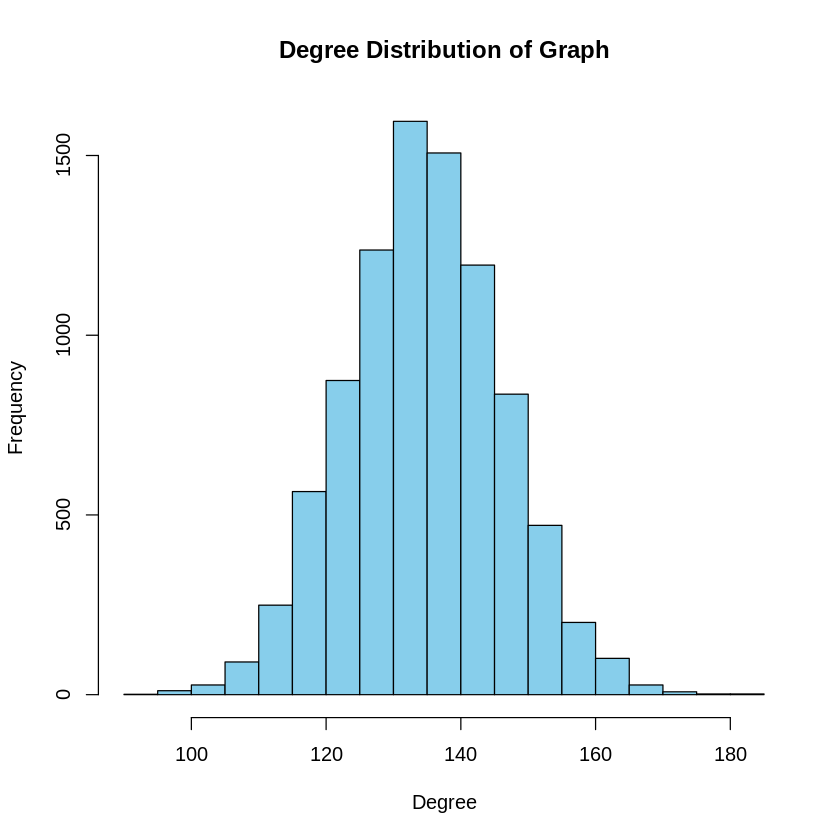

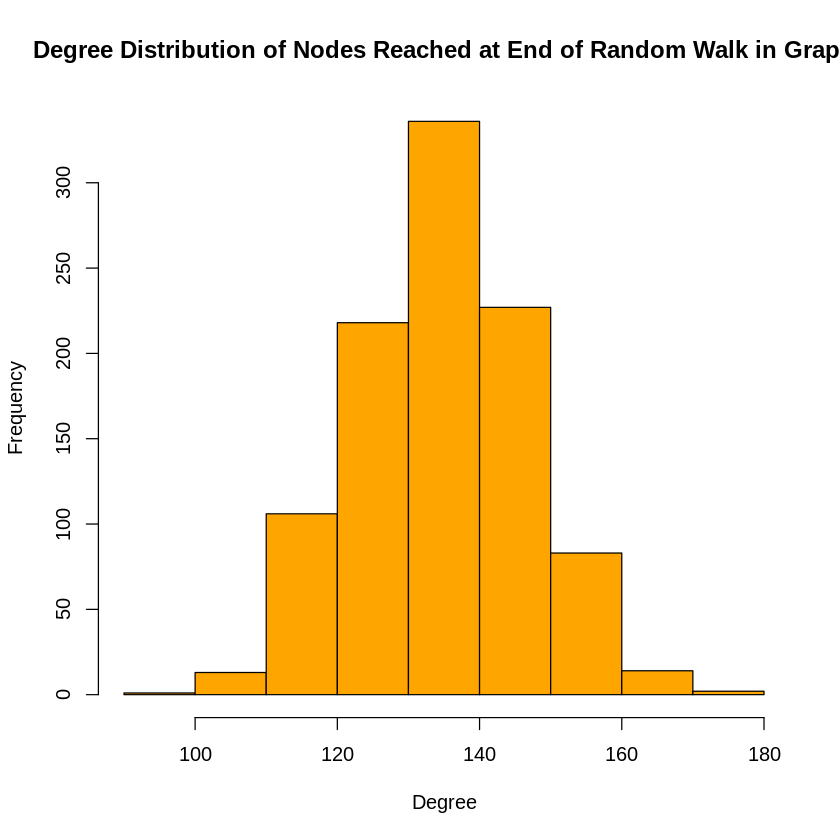

In [ ]:
# For the degree distribution of the graph
degreesVector9000 <- degree(random_network_9000)
hist(degreesVector9000,
     main = "Degree Distribution of Graph",
     col = "skyblue",
     xlab = "Degree",
     ylab = "Frequency"
)

# For the degree distribution of nodes reached at the end of random walk
degrees_lastnodes_9000 <- degree(random_network_9000, last_nodes_9000)
hist(degrees_lastnodes_9000,
     main = "Degree Distribution of Nodes Reached at End of Random Walk in Graph",
     col = "orange",
     xlab = "Degree",
     ylab = "Frequency"
)


In [ ]:
diameter(random_network)

[1] 5

In [ ]:
diameter(random_network_9000)

[1] 3

(d) Repeat 1(b) for undirected random networks with 9000 nodes. Compare the results
and explain qualitatively. Does the diameter of the network play a role?

## 2. Random walk on networks with fat-tailed degree distribution

### Question 2 (a)

IGRAPH 667a3db U--- 900 899 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)


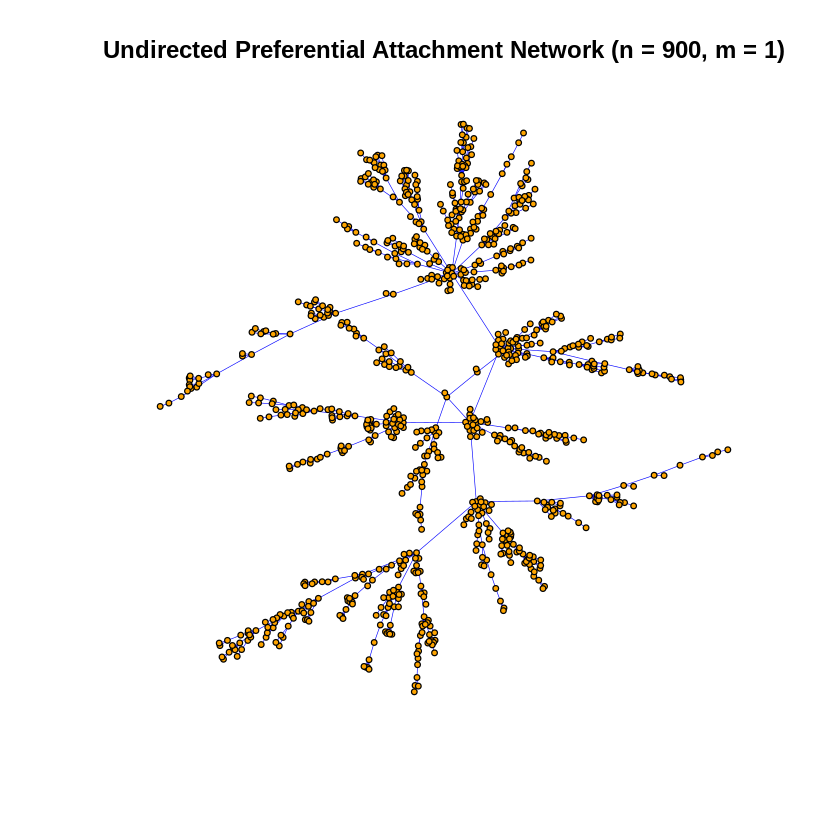

In [ ]:
# Number of nodes
n <- 900

# Number of nodes to which each new node attaches (m)
m <- 1

# Generate the preferential attachment network
pref_attach_network <- barabasi.game(n, m = m, directed = FALSE)

# Summary of the network
summary(pref_attach_network)

# Plot the network with a title
plot(pref_attach_network,
     main = "Undirected Preferential Attachment Network (n = 900, m = 1)",
     vertex.label = NA,
     vertex.size = 2,
     vertex.color = "orange",
     edge.color = "blue",
     edge.width = 0.5)


(a) Generate an undirected preferential attachment network with 900 nodes, where each
new node attaches to m = 1 old nodes.

### Question 2 (b)

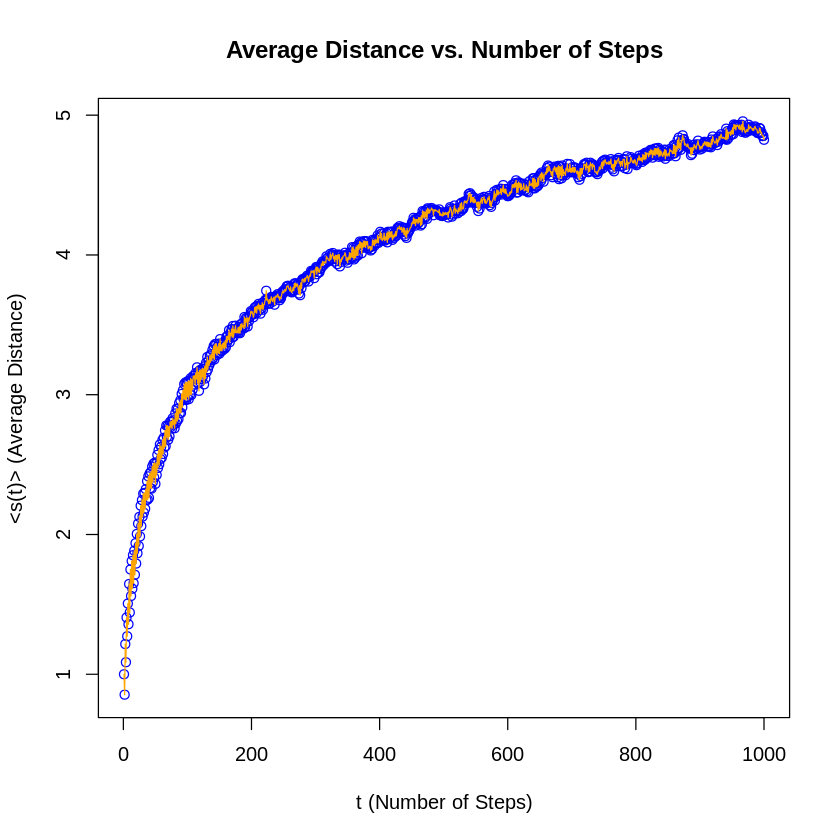

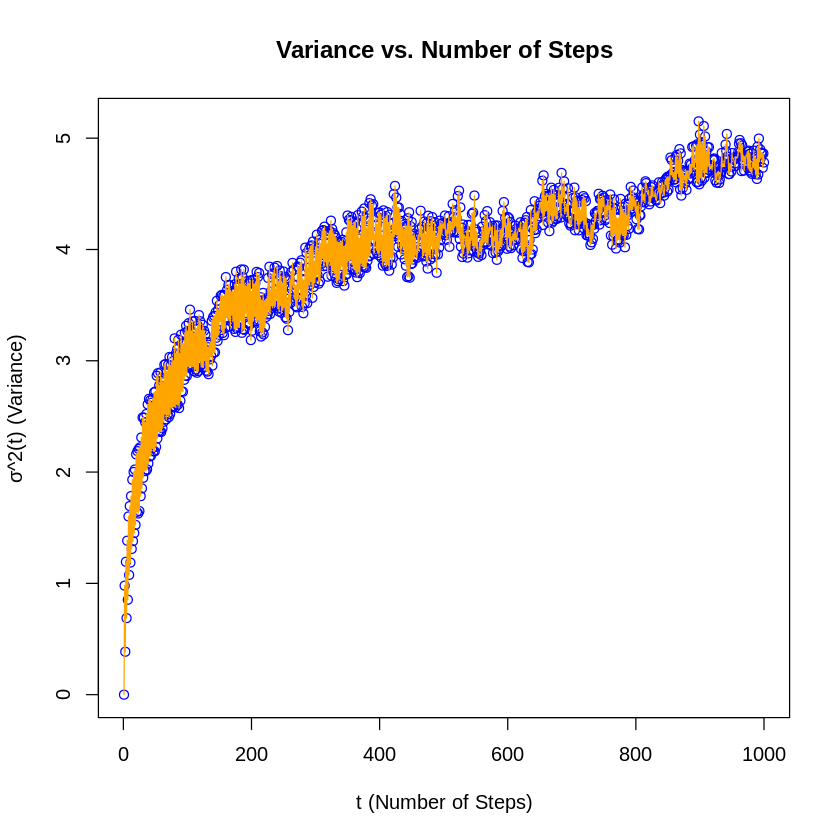

In [ ]:
last_nodes = plot_graph(pref_attach_network, 1000, 1000)

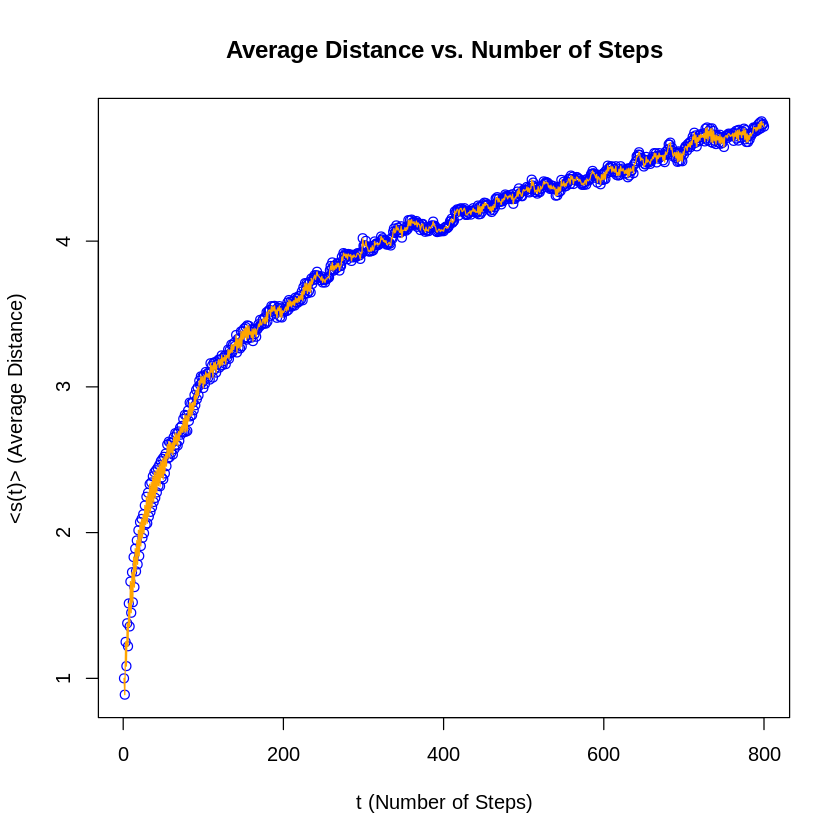

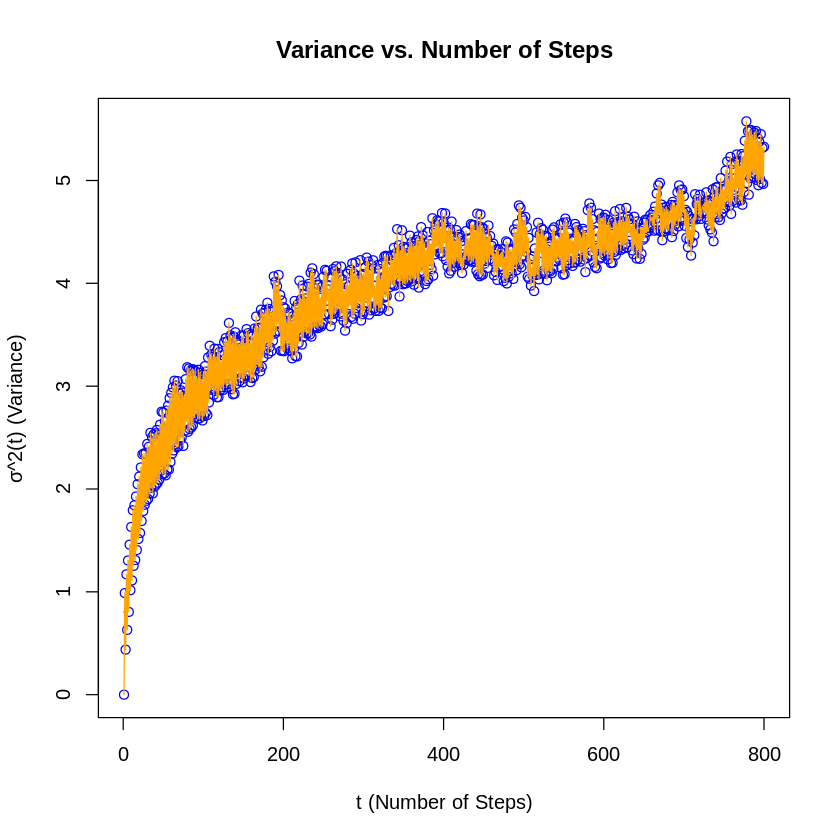

In [ ]:
last_nodes = plot_graph(pref_attach_network, 800, 1000)

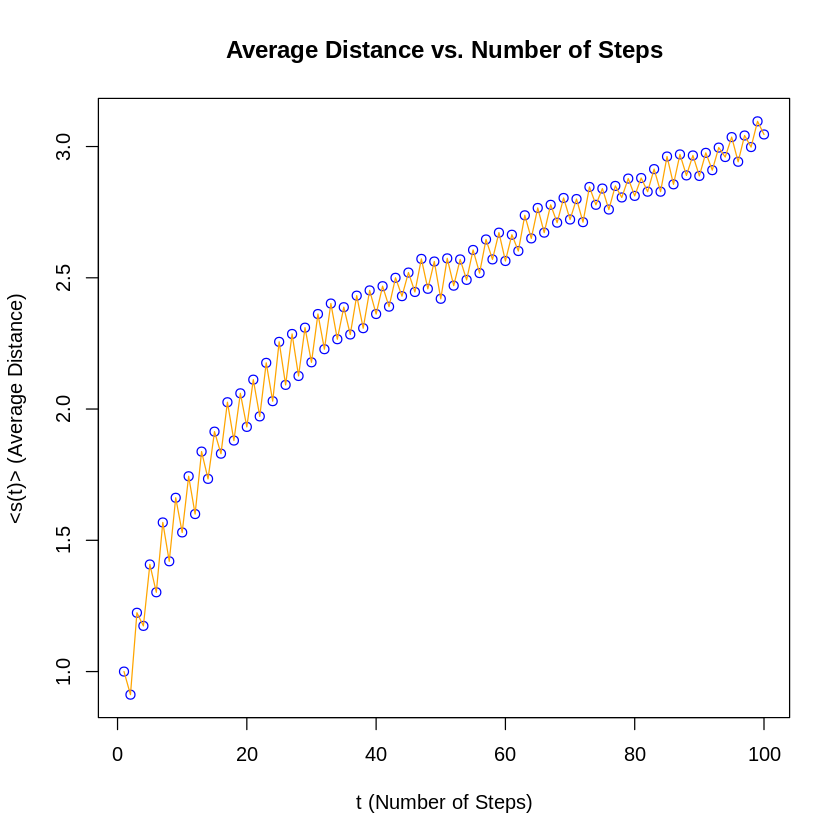

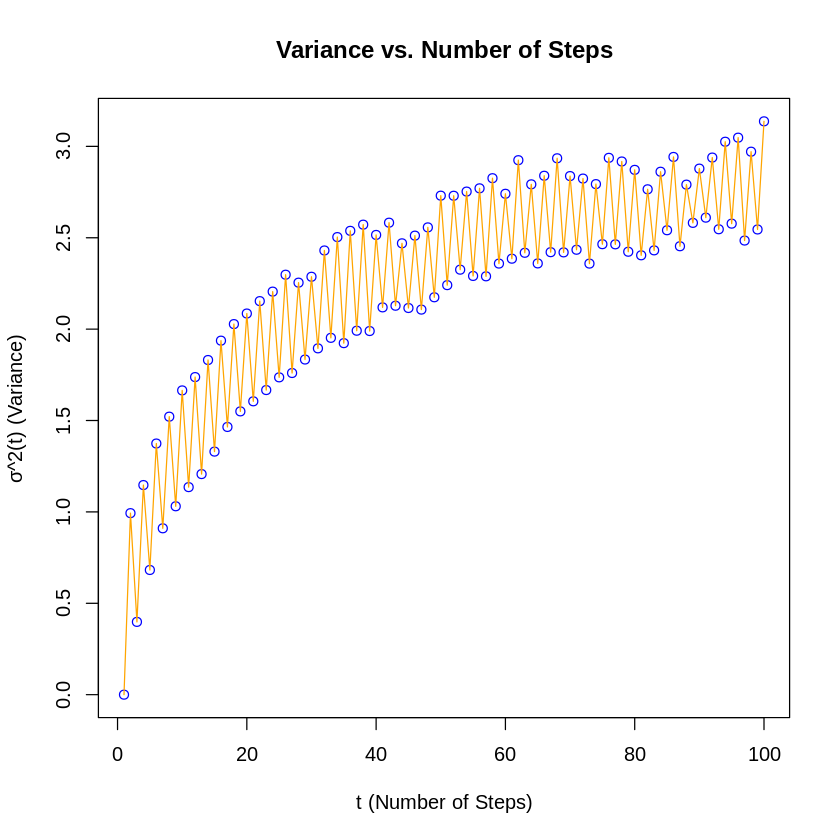

In [ ]:
last_nodes = plot_graph(pref_attach_network, 100, 1000)

(b) Let a random walker start from a randomly selected node. Measure and plot ⟨s(t)⟩
v.s. t and σ
2
(t) v.s. t.

### Question 2 (c)

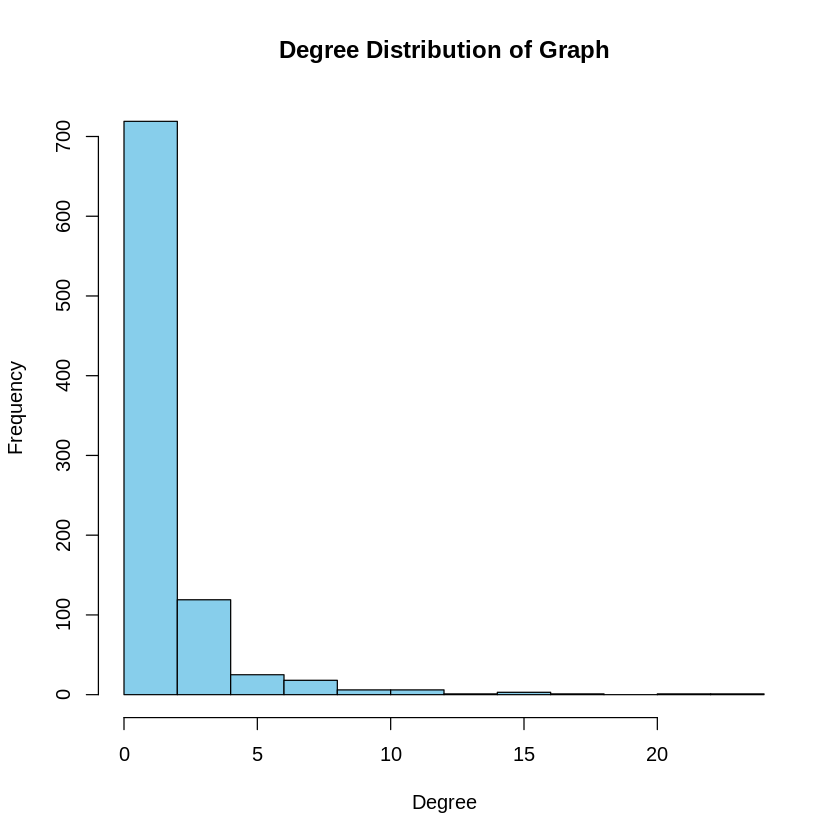

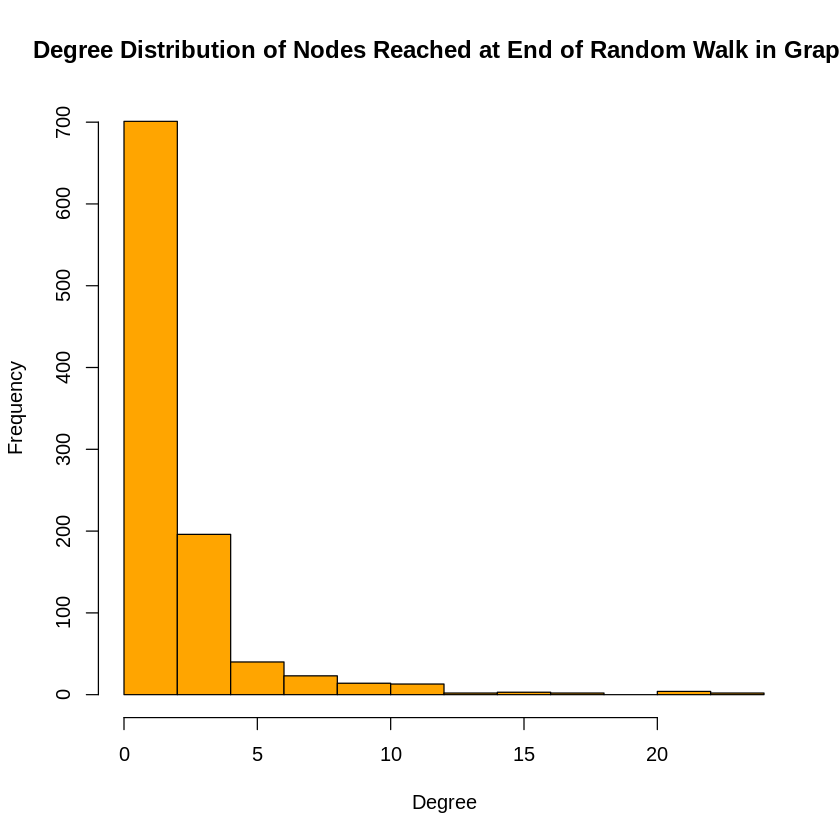

In [ ]:
# For the degree distribution of the graph
degreesVector <- degree(pref_attach_network)
hist(degreesVector,
     main = "Degree Distribution of Graph",
     col = "skyblue",
     xlab = "Degree",
     ylab = "Frequency"
)

# For the degree distribution of nodes reached at the end of random walk
degrees_lastnodes <- degree(pref_attach_network, last_nodes)
hist(degrees_lastnodes,
     main = "Degree Distribution of Nodes Reached at End of Random Walk in Graph",
     col = "orange",
     xlab = "Degree",
     ylab = "Frequency"
)


(c) Measure the degree distribution of the nodes reached at the end of the random walk
on this network. How does it compare with the degree distribution of the graph?

### Question 2 (d)

In [ ]:
# Number of nodes
n <- 90

# Number of nodes to which each new node attaches (m)
m <- 1

# Generate the preferential attachment network
pref_attach_network_90 <- barabasi.game(n, m = m, directed = FALSE)

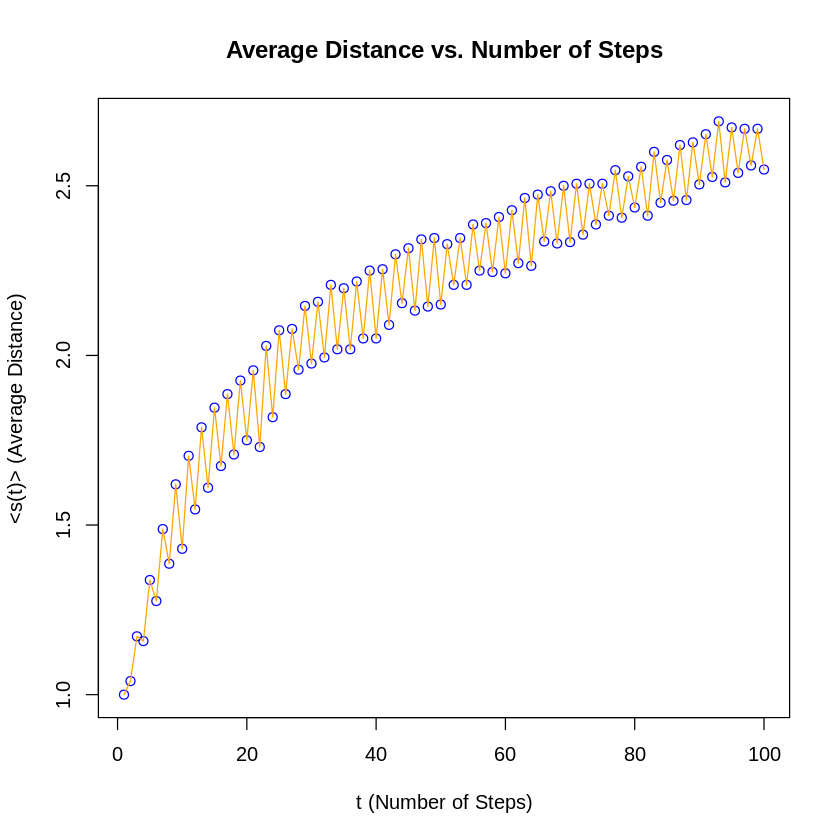

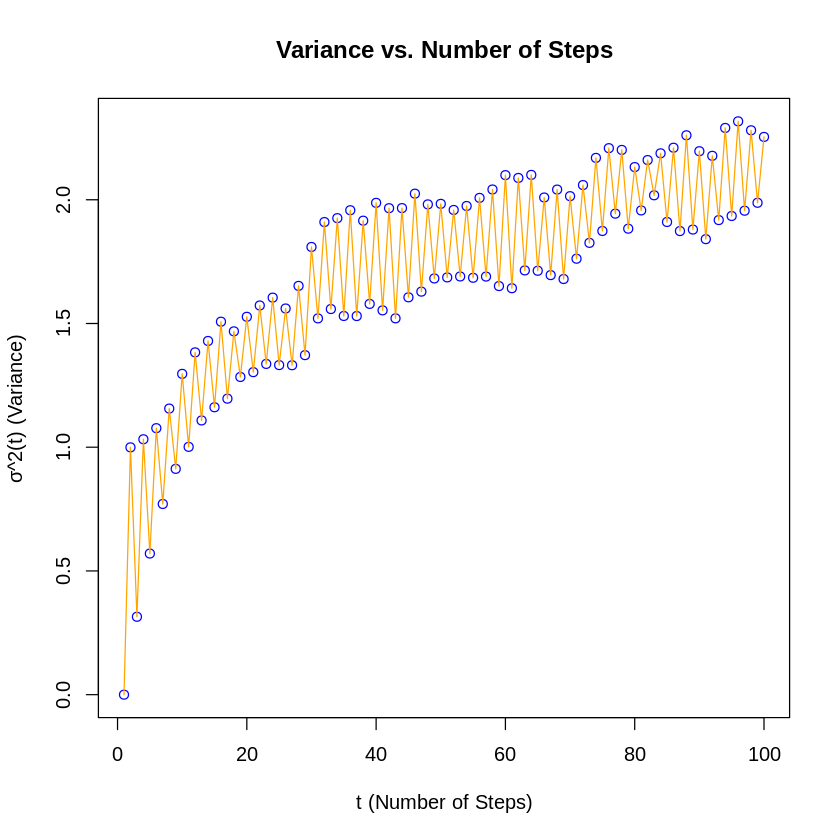

In [ ]:
last_nodes_90 = plot_graph(pref_attach_network_90, 100, 1000)

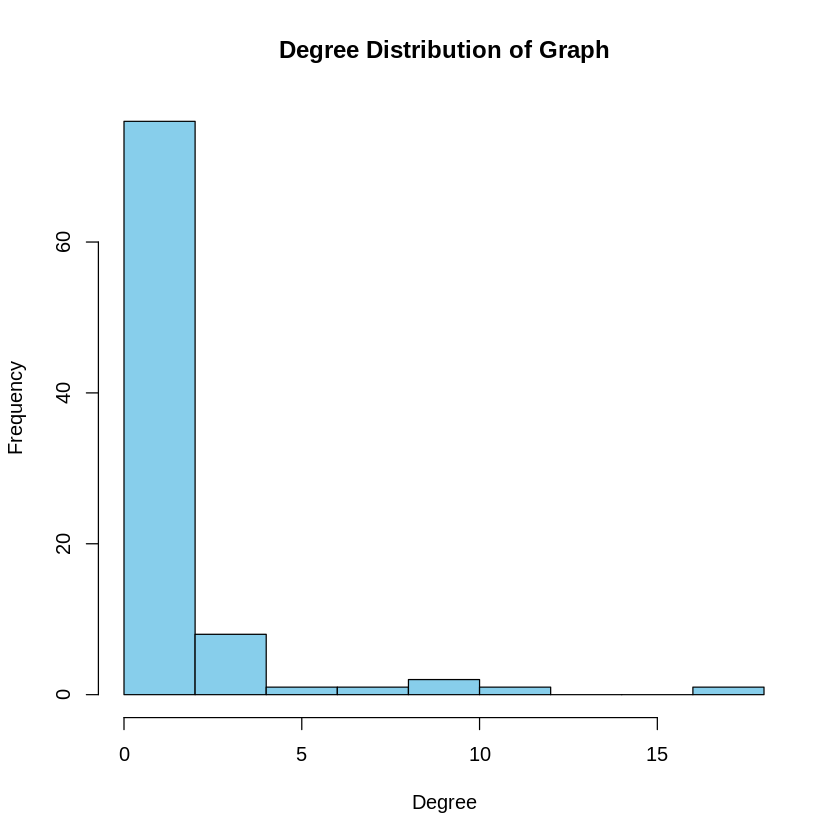

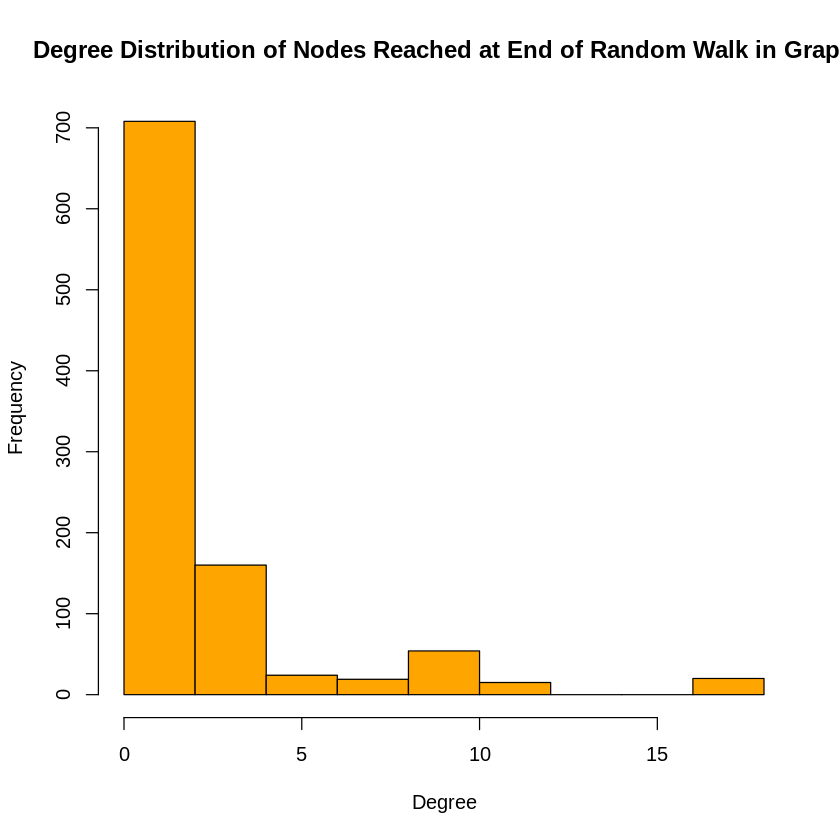

In [ ]:
# For the degree distribution of the graph
degreesVector_90 <- degree(pref_attach_network_90)
hist(degreesVector_90,
     main = "Degree Distribution of Graph",
     col = "skyblue",
     xlab = "Degree",
     ylab = "Frequency"
)

# For the degree distribution of nodes reached at the end of random walk
degrees_lastnodes_90 <- degree(pref_attach_network_90, last_nodes_90)
hist(degrees_lastnodes_90,
     main = "Degree Distribution of Nodes Reached at End of Random Walk in Graph",
     col = "orange",
     xlab = "Degree",
     ylab = "Frequency"
)


In [ ]:
# Number of nodes
n <- 9000

# Number of nodes to which each new node attaches (m)
m <- 1

# Generate the preferential attachment network
pref_attach_network_9000 <- barabasi.game(n, m = m, directed = FALSE)

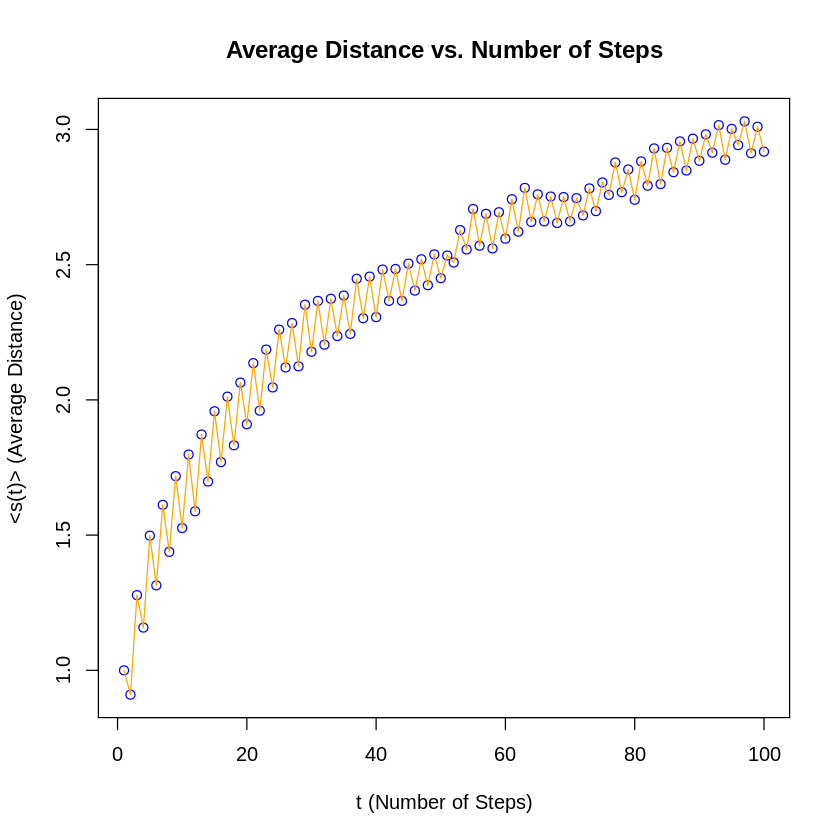

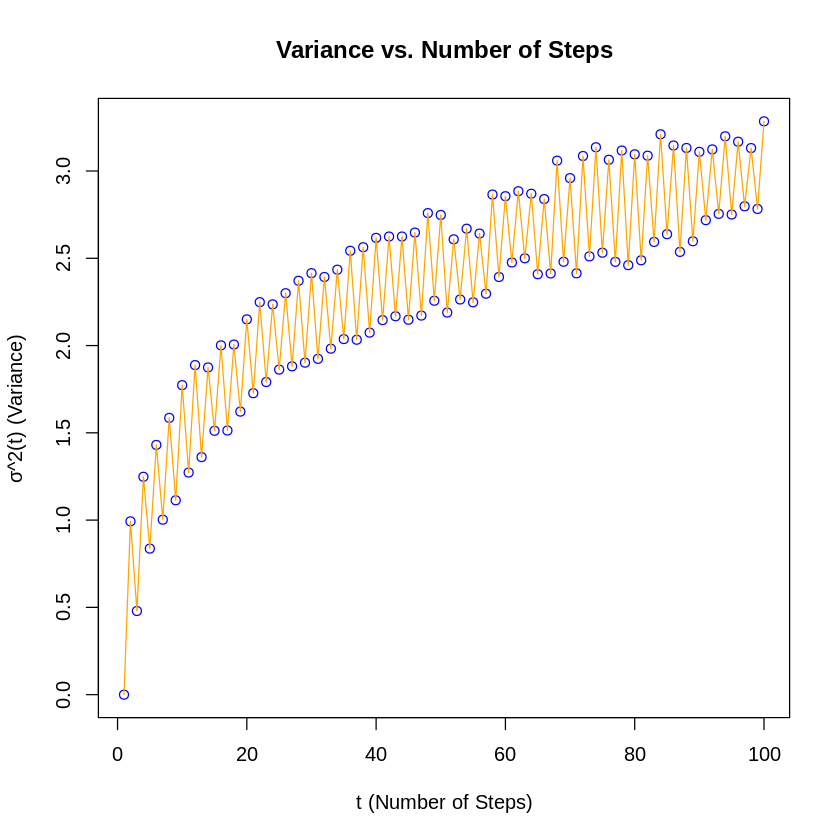

In [ ]:
last_nodes_9000 = plot_graph(pref_attach_network_9000, 100, 1000)

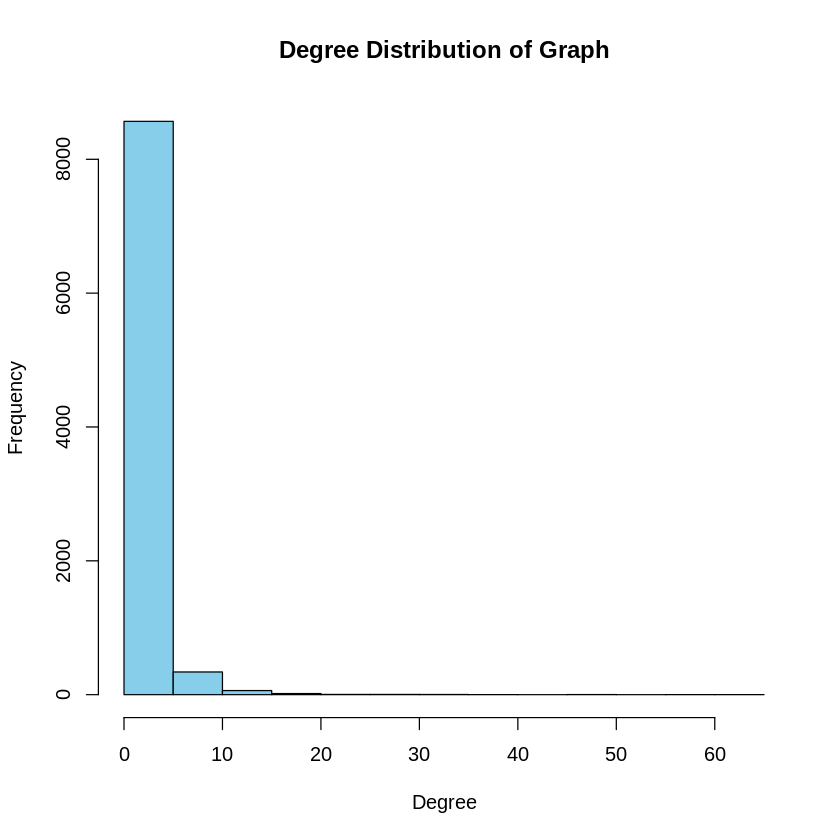

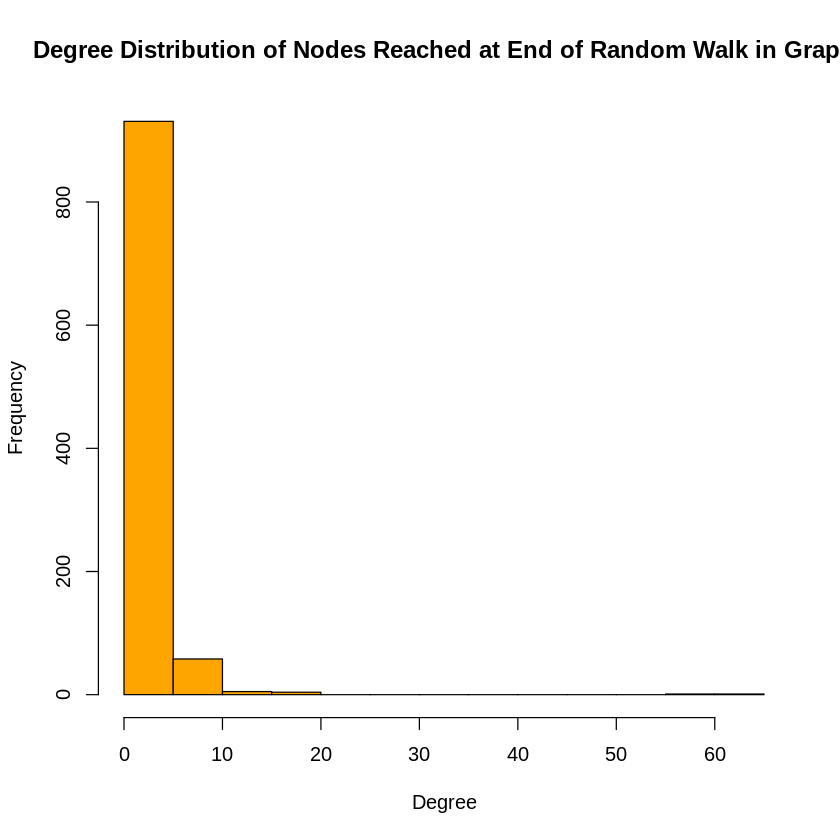

In [ ]:
# For the degree distribution of the graph
degreesVector_9000 <- degree(pref_attach_network_9000)
hist(degreesVector_9000,
     main = "Degree Distribution of Graph",
     col = "skyblue",
     xlab = "Degree",
     ylab = "Frequency"
)

# For the degree distribution of nodes reached at the end of random walk
degrees_lastnodes_9000 <- degree(pref_attach_network_9000, last_nodes_9000)
hist(degrees_lastnodes_9000,
     main = "Degree Distribution of Nodes Reached at End of Random Walk in Graph",
     col = "orange",
     xlab = "Degree",
     ylab = "Frequency"
)


(d) Repeat 2(b) for preferential attachment networks with 90 and 9000 nodes, and m = 1.
Compare the results and explain qualitatively. Does the diameter of the network play
a role?

In [ ]:
diameter(pref_attach_network)
diameter(pref_attach_network_90)
diameter(pref_attach_network_9000)


[1] 21

[1] 12

[1] 27

## 3. PageRank
The PageRank algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global “importance” scores that can be used to influence the
ranking of search results. Here, we use random walk to simulate PageRank.

### Question 3 (a)

In [ ]:
create_transition_matrix <- function(g) {
    if (!is_connected(g)) {
        stop("Graph is not connected")
    }

    n <- vcount(g)
    adj <- as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] <- 1
    z <- rowSums(adj)

    transition_matrix <- adj / matrix(z, nrow = n, ncol = n, byrow = TRUE)

    return(transition_matrix)
}


In [ ]:
random_walk_custom <- function(g, num_steps, start_node, transition_matrix = NULL, teleportation = 0.0, teleport_visit_mode = "equal") {
    if (is.null(transition_matrix))
        transition_matrix <- create_transition_matrix(g)

    # Define visit probabilities based on teleportation mode
    switch(teleport_visit_mode,
        "equal" = {
            visit_probs <- rep(1/vcount(g), vcount(g))
        },
        "pg" = {
            pg_ranks <- page_rank(g, directed = TRUE)$vector
            visit_probs <- pg_ranks / sum(pg_ranks)
        },
        "pg_median" = {
            pg_ranks <- page_rank(g, directed = TRUE)$vector
            df <- data.frame("idx" = 1:vcount(g), "val" = pg_ranks)
            df <- df[order(df$val), ]
            visit_probs <- rep(0, vcount(g))
            mid <- vcount(g) %/% 2
            visit_probs[df$idx[mid:mid+1]] <- 0.5
        },
        {
            visit_probs <- rep(1/vcount(g), vcount(g))
        }
    )

    # Perform the random walk
    v <- start_node
    vert_seq <- vector("numeric", length = num_steps)

    for (i in 1:num_steps) {
        if (runif(1) < teleportation) {
            v <- sample(1:vcount(g), 1, prob = visit_probs)
        } else {
            PMF <- transition_matrix[v, ]
            v <- sample(1:vcount(g), 1, prob = PMF)
        }
        vert_seq[i] <- v
    }

    return(vert_seq)
}

In [ ]:
perform_random_walk_custom <- function(g, steps, iters, teleportation = 0.0, teleport_visit_mode = "equal") {
    n_node_visits <- array(0, vcount(g))
    n_steady_state <- ceiling(log(vcount(g)))

    for (i in 1:iters) {
        start_vert <- sample(1:vcount(g), 1)
        vert_seq <- random_walk_custom(g, steps, start_vert, teleportation = teleportation, teleport_visit_mode = teleport_visit_mode)

        for (j in 1:length(vert_seq)) {
            if (j > n_steady_state) {
                n_node_visits[vert_seq[j]] <- n_node_visits[vert_seq[j]] + 1
            }
        }
    }

    return(n_node_visits / ((steps - n_steady_state) * iters))
}

In [ ]:
create_transition_matrix = function (g){

    # WARNING: make sure your graph is connected (you might input GCC of your graph)

    if(!is_connected(g)){
        print("Not connected")
    }

    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))

    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities

    return(transition_matrix)
}

random_walk_custom = function (g, num_steps, start_node, transition_matrix = NULL, teleportation=0.0, teleport_visit_mode="equal"){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)

    v = start_node
    vert_seq = array(NA, length(num_steps))

    switch(teleport_visit_mode,
    "equal"={
        visit_probs=array(1/vcount(g), vcount(g))
    },
    "pg"={
        pg_ranks=page_rank(g, directed=T)$vector
        visit_probs=pg_ranks/sum(pg_ranks)
    },
    "pg_median"={
        pg_ranks=page_rank(g, directed=T)$vector
        df = data.frame("idx"=1:vcount(g), "val"=pg_ranks)
        df=df[order(df$val),]
        visit_probs=array(0, vcount(g))
        mid=vcount(g) %/% 2
        visit_probs[df$idx[mid:mid+1]]=0.5
    },
    {
       visit_probs=array(1/vcount(g), vcount(g))
    }
    )




    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        if(runif(1)<teleportation){
            v = sample(1:vcount(g), 1, prob = visit_probs)
        }
        else{
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
        vert_seq[i] = v
    }

    return(vert_seq)
}

perform_random_walk_custom = function(g, steps, iters, teleportation=0.0, teleport_visit_mode="equal"){
    n_node_visits=array(0, vcount(g))
    n_steady_state = ceiling(log(vcount(g)))
    for(i in 1:iters){
        start_vert = sample(1:vcount(g), 1)
        vert_seq = random_walk_custom(g, steps, start_vert, teleportation=teleportation, teleport_visit_mode=teleport_visit_mode)
        for (j in 1:length(vert_seq)) {
            if (j > n_steady_state) {
                n_node_visits[vert_seq[j]] = n_node_visits[vert_seq[j]] + 1
            }
        }
    }
    return (n_node_visits / ((steps-n_steady_state) * iters))
}

In [ ]:
# Generating 2 networks with 900 nodes and m = 4

graph_1 <- sample_pa(n=900, m=4, directed=T)
graph_2 <- sample_pa(n=900, m=4, directed=T)

In [ ]:
g2p <- permute(graph_2, sample(vcount(graph_2)))

In [ ]:
final_graph = add_edges(graph_1, c(t(as_edgelist(g2p))))

In [ ]:
set.seed(1)

iters=100
steps=1000

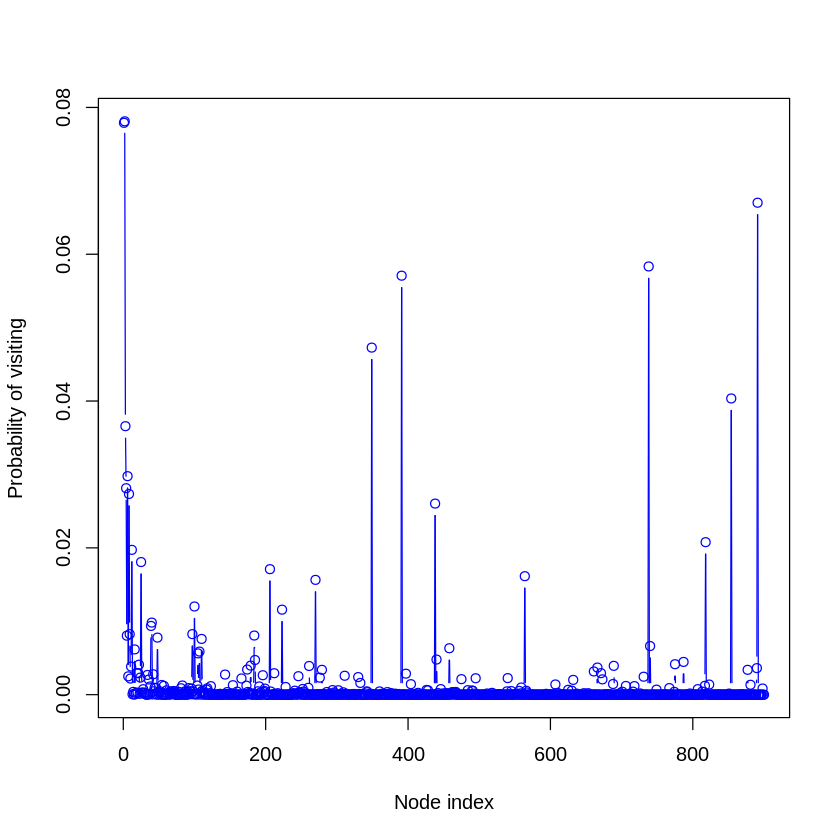

In [ ]:
node_visits_probs = perform_random_walk_custom(final_graph, steps, iters)

plot(node_visits_probs, type="b", xlab='Node index', ylab='Probability of visiting', col = 'blue')

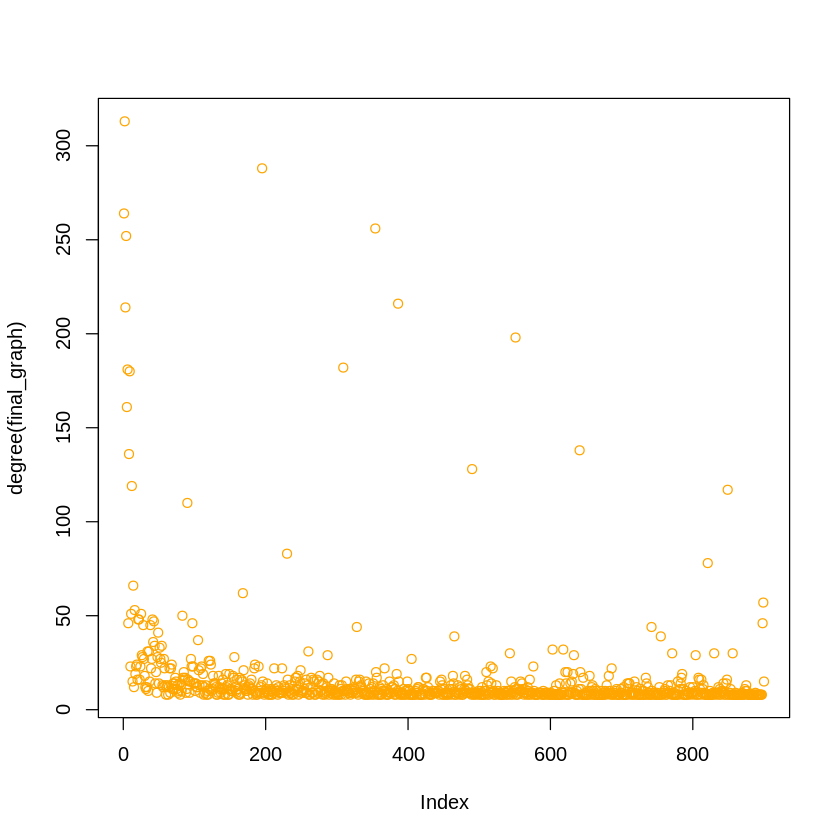

In [ ]:
plot(degree(final_graph), col = "orange")

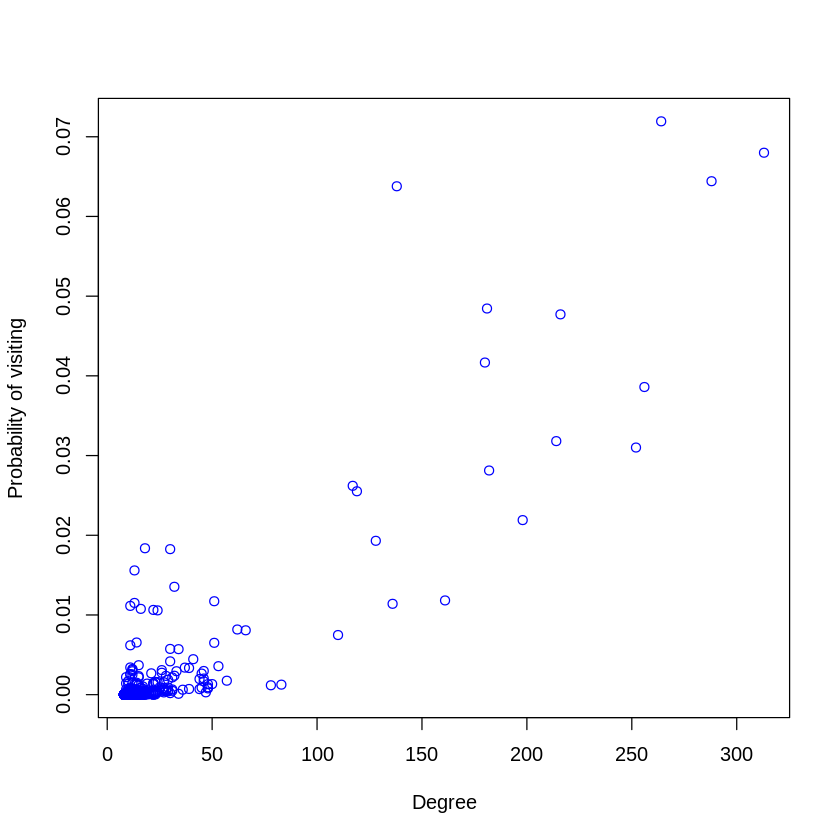

In [ ]:
plot(degree(final_graph), node_visits_probs, xlab = 'Degree', ylab = 'Probability of visiting', col = 'blue')

In [ ]:
fit_line = function(x, y, log=FALSE){
    if(log){
        slope <- getElement(lm(log(y) ~ log(x))$coefficients[2], "log(x)")
        intercept <- getElement(lm(log(y) ~ log(x))$coefficients[1], "(Intercept)")
    }
    else{
        slope <- getElement(lm(y ~ x)$coefficients[2], "x")
        intercept <- getElement(lm(y ~ x)$coefficients[1], "(Intercept)")
    }

    print('Slope')
    print(slope)

    print('Intercept')
    print(intercept)
    return (list(slope, intercept))
}

[1] "Slope"
[1] 0.0001975949
[1] "Intercept"
[1] -0.002041626
[1] "Correlation Coefficient"
[1] 0.8844222


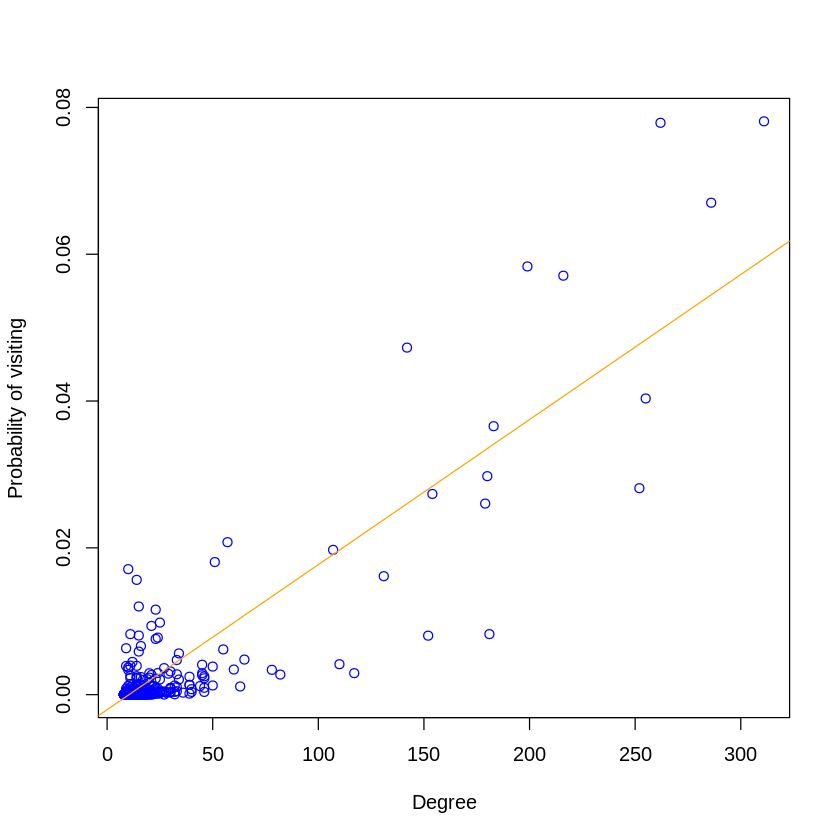

In [ ]:
fit_result <- fit_line(degree(final_graph), node_visits_probs)

slope <- fit_result$slope

plot(degree(final_graph), node_visits_probs, xlab = 'Degree', ylab = 'Probability of visiting',main = sprintf("gamma=%.4f", slope), col = 'blue')
abline(lm(node_visits_probs ~ degree(final_graph)), col="orange")

print('Correlation Coefficient')
print(cor(degree(final_graph), node_visits_probs))

(a) We are going to create a directed random network with 900 nodes, using the preferential attachment model. Note that in a directed preferential attachment network, the
out-degree of every node is m, while the in-degrees follow a power law distribution.
One problem of performing random walk in such a network is that, the very first
node will have no outbounding edges, and be a “black hole” which a random walker
can never “escape” from. To address that, let’s generate another 900-node random
network with preferential attachment model, and merge the two networks by adding
the edges of the second graph to the first graph with a shuffling of the indices of the
nodes. For example, Create such a network using m = 4. Measure the probability that the walker visits
each node. Is this probability related to the degree of the nodes?
Hint Useful function(s): asedgelist , sample , permute , addedges

### Question 3 (b)

In [ ]:
iters = 100
steps = 1000
alpha = 0.2

In [ ]:
node_visits_probs_equal=perform_random_walk_custom(final_graph, steps, iters, teleportation=alpha, teleport_visit_mode="equal")

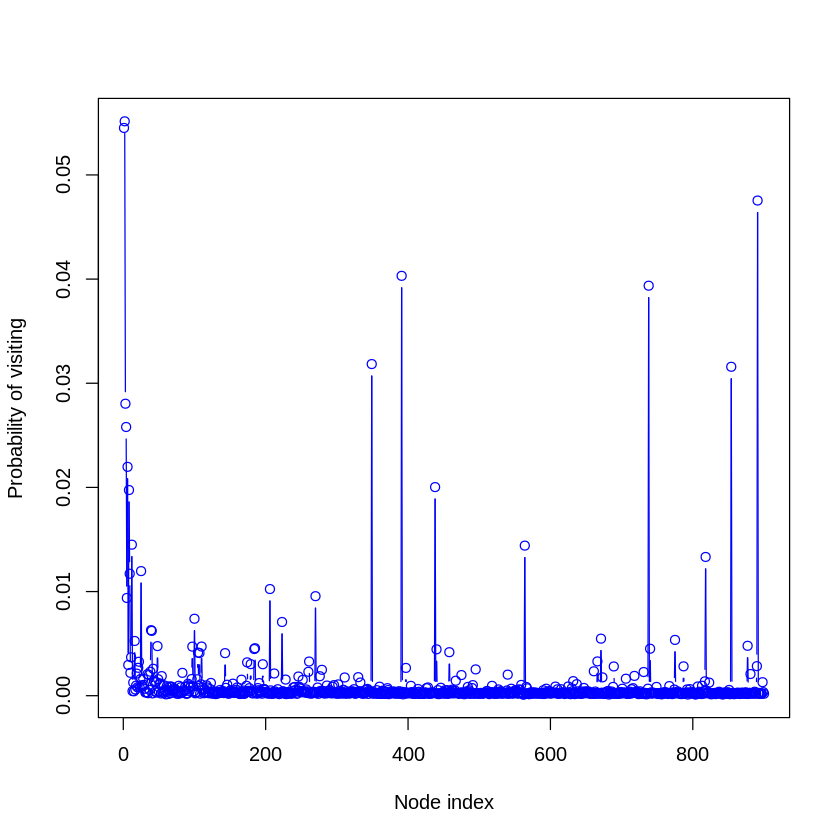

In [ ]:
plot(node_visits_probs_equal, type="b", xlab='Node index', ylab='Probability of visiting', col = 'blue')

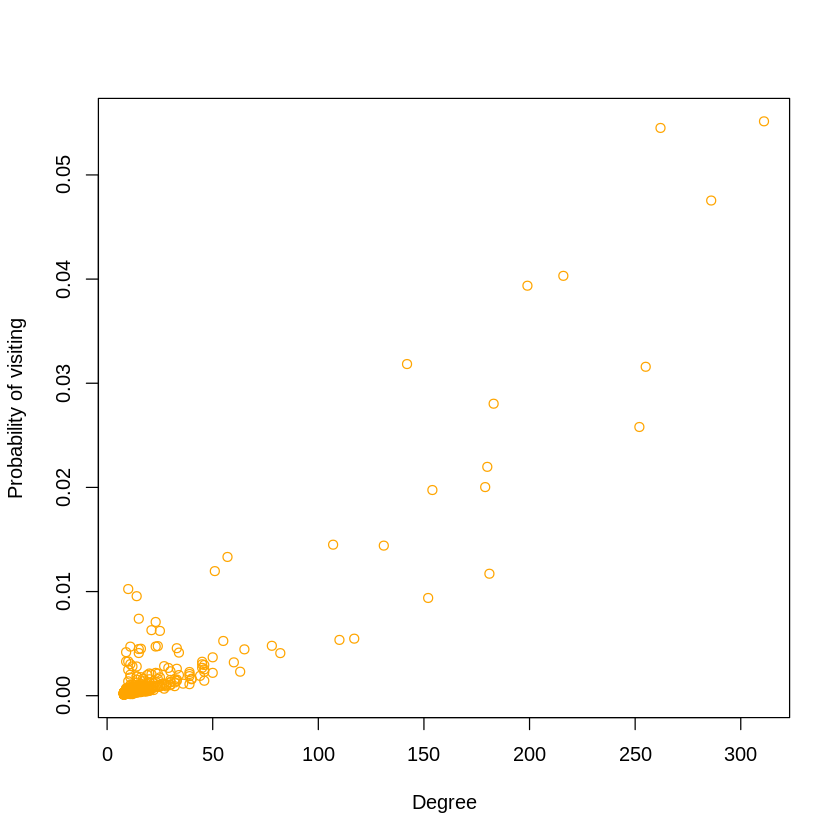

In [ ]:
plot(degree(final_graph), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting', col = 'orange')

[1] "Slope"
[1] 0.0001468477
[1] "Intercept"
[1] -0.001231925
[1] "Correlation Coefficient"
[1] 0.9249222


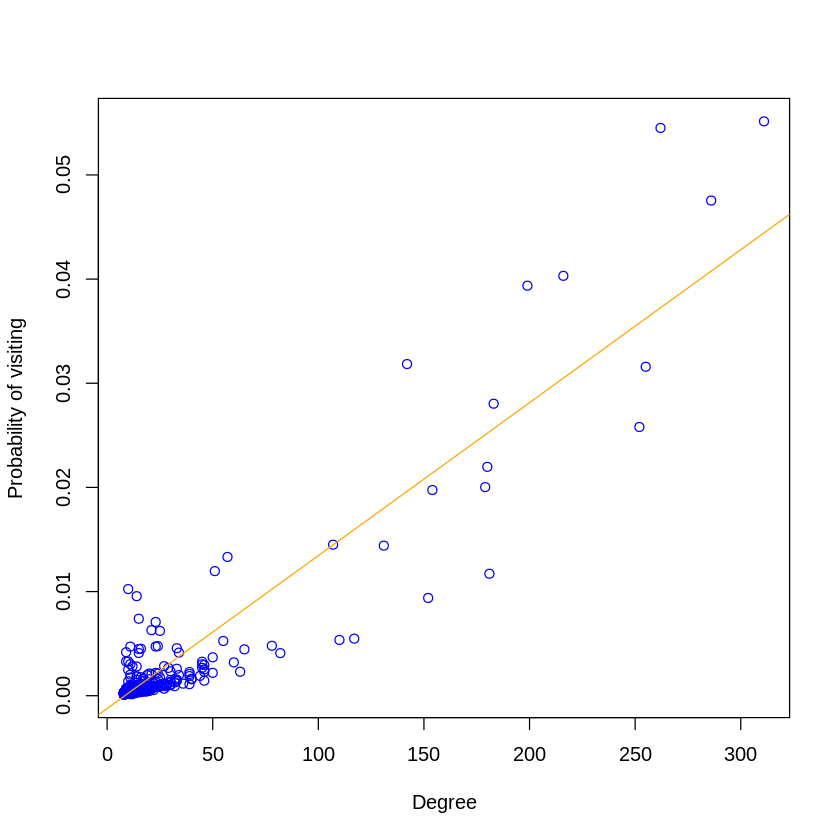

In [ ]:
fit_result <- fit_line(degree(final_graph), node_visits_probs_equal)
slope_equal <- fit_result$slope

plot(degree(final_graph), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_equal), col = 'blue')
abline(lm(node_visits_probs_equal ~ degree(final_graph)), col="orange")

print('Correlation Coefficient')
print(cor(degree(final_graph), node_visits_probs_equal))

(b) In all previous questions, we didn’t have any teleportation. Now, we use a teleportation probability of α = 0.2 (teleport out of a node with prob=0.2 instead of going to
its neighbor). By performing random walks on the network created in 3(a), measure
the probability that the walker visits each node. How is this probability related to
the degree of the node and α ?

## 4. Personalized PageRank
While the use of PageRank has proven very effective, the web’s rapid growth in size and
diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user
should be able to define their own notion of importance for each individual query.

### Question 4 (a)

In [ ]:
node_visits_probs_pg=perform_random_walk_custom(final_graph, steps, iters, teleportation=alpha, teleport_visit_mode="pg")

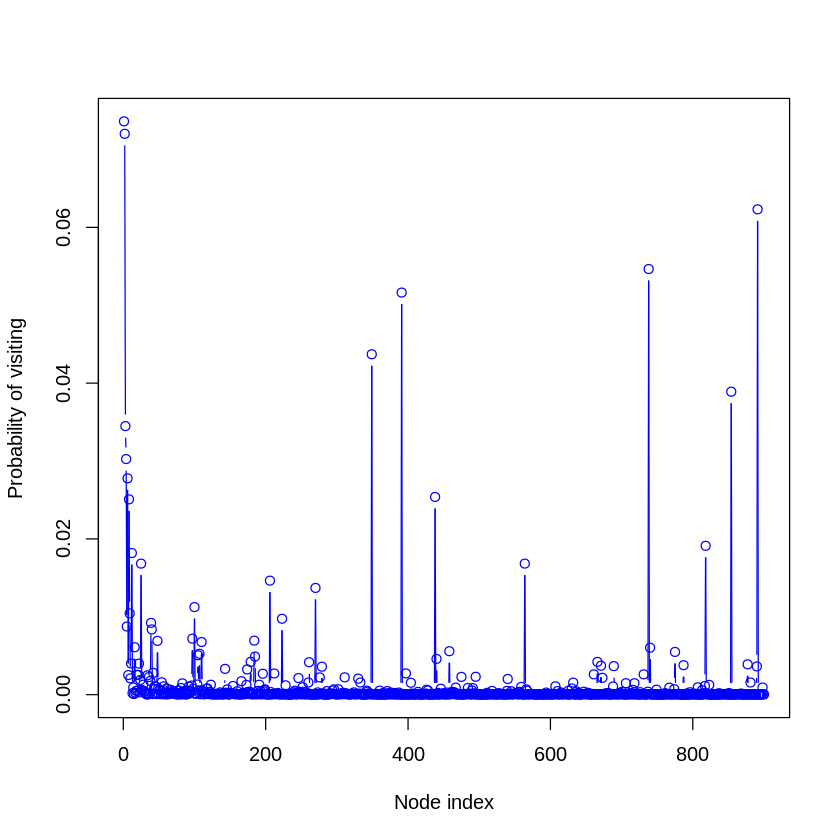

In [ ]:
plot(node_visits_probs_pg, type="b", xlab='Node index', ylab='Probability of visiting', col = 'blue')

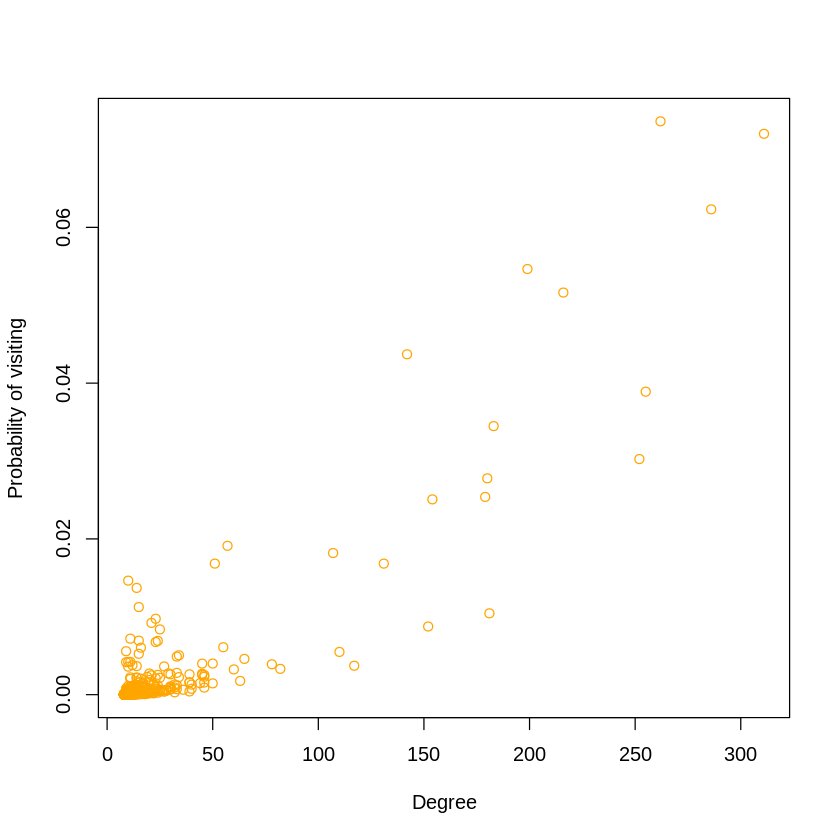

In [ ]:
plot(degree(final_graph), node_visits_probs_pg, xlab='Degree', ylab='Probability of visiting', col = 'orange')

[1] "Slope"
[1] 0.0001876749
[1] "Intercept"
[1] -0.001883346
[1] "Correlation Coefficient"
[1] 0.89867


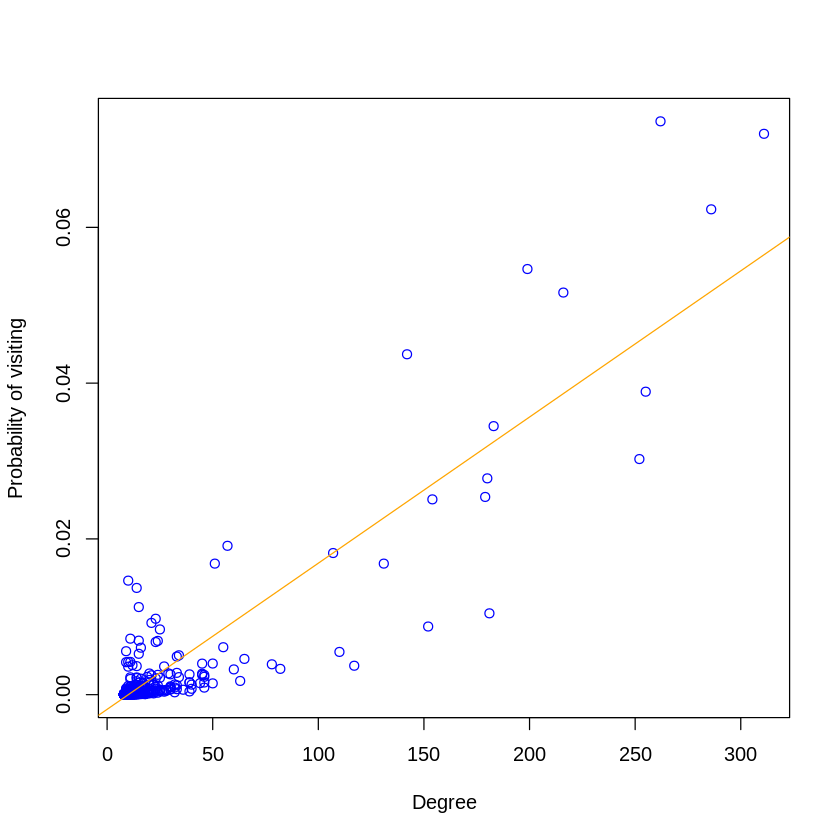

In [ ]:
fit_result <- fit_line(degree(final_graph), node_visits_probs_pg)
slope_pg <- fit_result$slope
plot(degree(final_graph), node_visits_probs_pg, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_pg), col = 'blue')
abline(lm(node_visits_probs_pg ~ degree(final_graph)), col="orange")

print('Correlation Coefficient')
print(cor(degree(final_graph), node_visits_probs_pg))

(a) Suppose you have your own notion of importance. Your interest in a node is proportional to the node’s PageRank, because you totally rely upon Google to decide which
website to visit (assume that these nodes represent websites). Again, use random
walk on network generated in question 3 to simulate this personalized PageRank.
Here the teleportation probability to each node is proportional to its PageRank (as
opposed to the regular PageRank, where at teleportation, the chance of visiting all
nodes are the same and equal to 1
N
).  Again, let the teleportation probability be
equal to α = 0.2. Compare the results with 3(a).

### Question 4 (b)

In [ ]:
n_node_visits_pg_median = perform_random_walk_custom(final_graph, steps, iters, teleportation=alpha, teleport_visit_mode="pg_median")

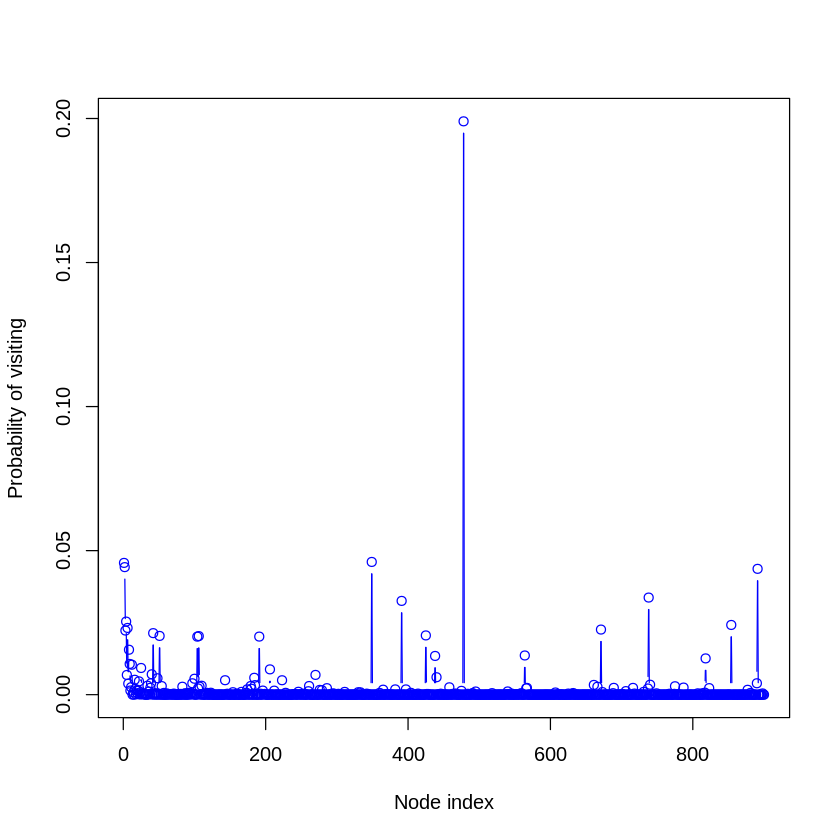

In [ ]:
plot(n_node_visits_pg_median, type="b", xlab='Node index', ylab='Probability of visiting', col = 'blue')

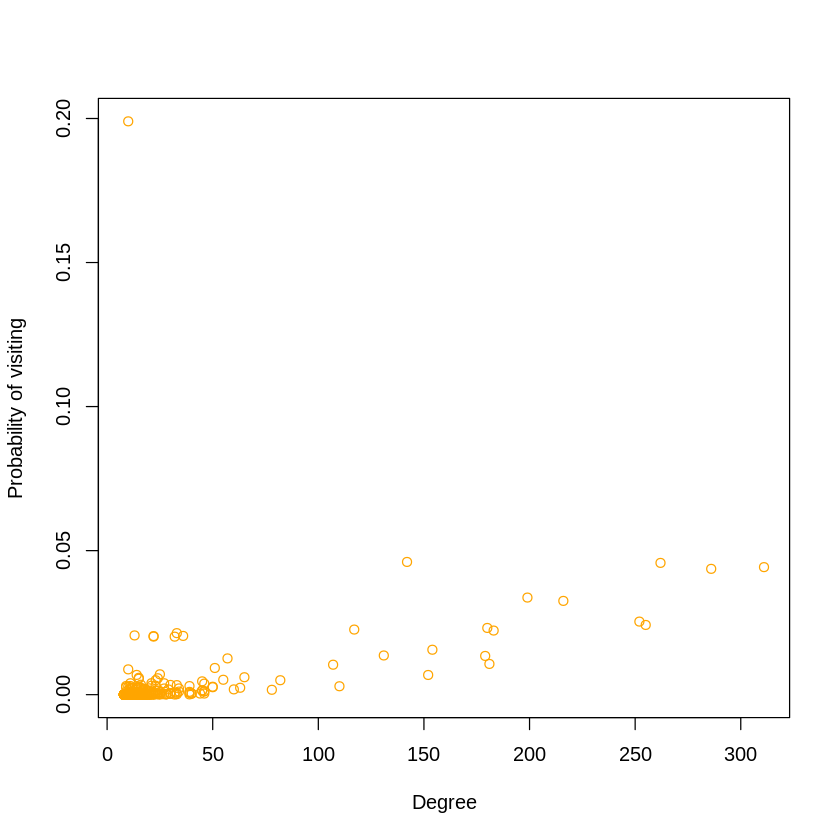

In [ ]:
plot(degree(final_graph), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting', col = 'orange')

[1] "Slope"
[1] 0.0001310688
[1] "Intercept"
[1] -0.0009801638
[1] "Correlation Coefficient"
[1] 0.4570713


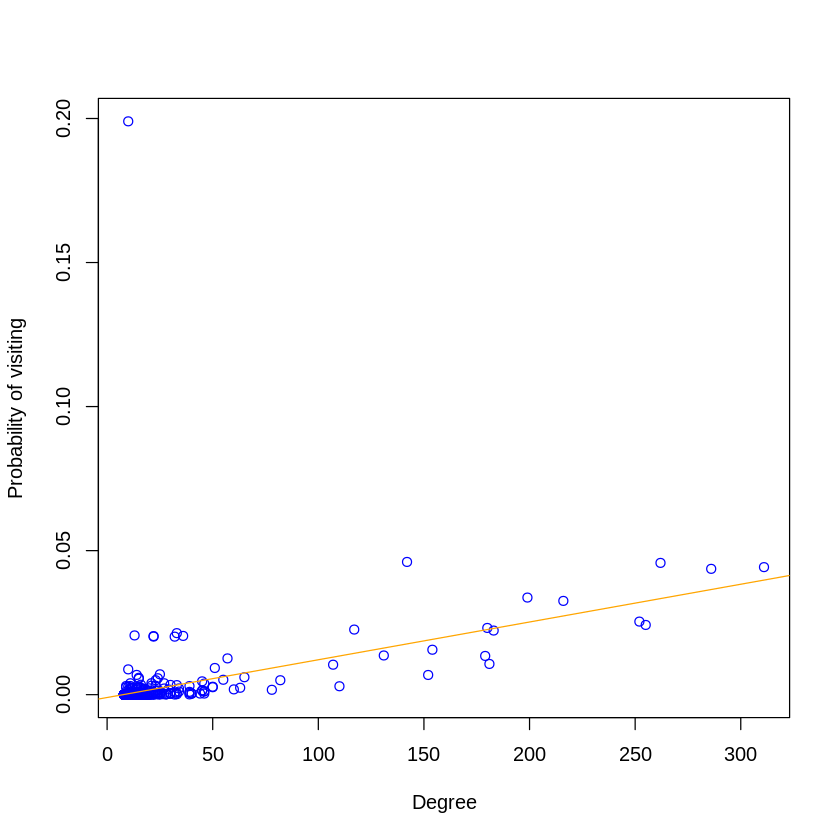

In [ ]:
fit_result <- fit_line(degree(final_graph), n_node_visits_pg_median)
slope_pg_median <- fit_result$slope

plot(degree(final_graph), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_pg_median), col = 'blue')
abline(lm(n_node_visits_pg_median ~ degree(final_graph)), col="orange")

print('Correlation Coefficient')
print(cor(degree(final_graph), n_node_visits_pg_median))

(b) Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilities 1/2, 1/2). How are the
PageRank values affected?

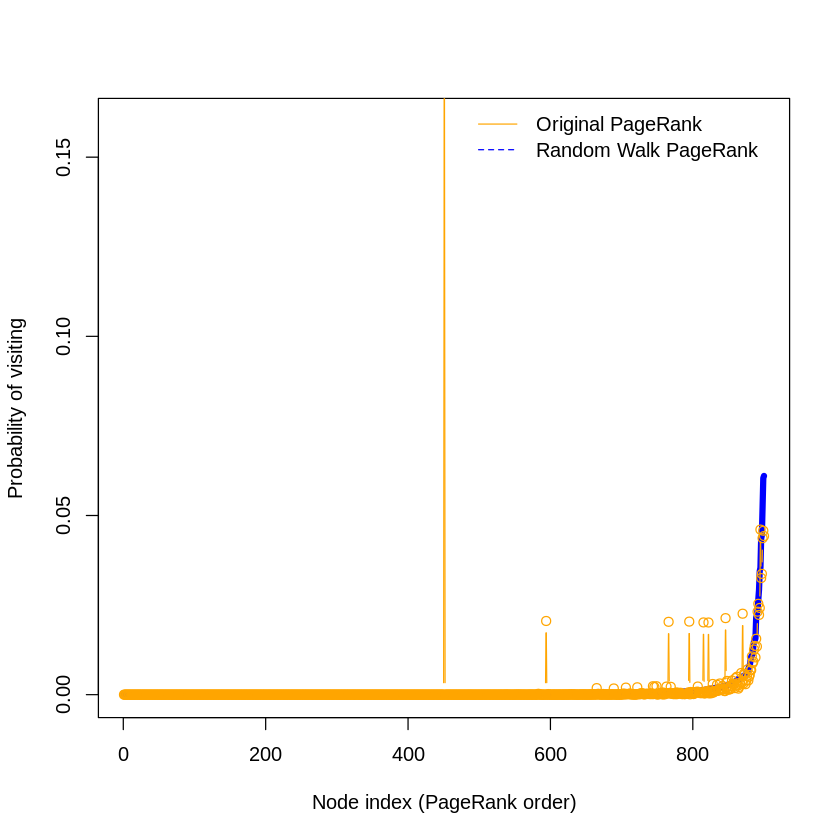

In [ ]:
pageranks = page_rank(final_graph)$vector

plot(sort(pageranks), col="blue", type='l',lwd=5, ylim=c(0,0.16), xlab='Node index (PageRank order)', ylab='Probability of visiting')
lines(n_node_visits_pg_median[order(pageranks)], col="orange", type='b')

legend("topright", legend = c("Original PageRank", "Random Walk PageRank"), col = c("orange", "blue"), bty = "n", lty=1:2, cex=1)

### Question 4 (c)

(c) More or less, 4(b) is what happens in the real world, in that a user browsing the web
only teleports to a set of trusted web pages. However, this is against the assumption
of normal PageRank, where we assume that people’s interest in all nodes are the
same. Can you take into account the effect of this self-reinforcement and adjust the
PageRank equation?

To account for self-reinforcement in the PageRank equation, we can introduce a damping factor that represents the probability of following a link versus randomly teleporting to any node. This modification acknowledges the inherent bias towards highly connected nodes while still allowing for random exploration of the network. Mathematically, this adjustment can be incorporated into the PageRank algorithm as follows:

$$  PR(u) = \frac{1 - \alpha}{N} + \alpha \sum_{v \in B_u} \frac{PR(v)}{C_v}  $$

Where:
- \( PR(u) \) is the PageRank of node \( u \).
- \( N \) is the total number of nodes in the network.
- \( α \) is the damping factor (typically set between 0.1 and 0.2).
- \( B<sub>u</sub> \) represents the set of nodes that link to node \( u \).
- \( C <sub>v</sub> \) denotes the out-degree of node \( v \).

This adjusted formula reflects the idea that a node's importance is not only influenced by the number of incoming links but also by the importance of the linking nodes and their own link structures. By incorporating self-reinforcement in this manner, the modified PageRank equation better aligns with real-world scenarios where nodes with higher PageRank values tend to attract more attention and reinforcement.